In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from itertools import combinations

In [8]:
from statannotations.Annotator import Annotator

## Genera Level Log Ratio - Bifidobacterium+Prevotella/Escherichia+Bacteroides

In [9]:
genera_lr = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/RPCA/merged_4genera_lr.tsv', sep='\t', index_col=0)
genera_lr.head()

Current_Natural_Log_Ratio collection_timepoint  \
#SampleID                                                       
14577.EM.TP1                    2.669448                  Pre   
14577.GK.TP1                   -2.014217                  Pre   
14577.AB.TP1                   -2.310400                  Pre   
14577.JR.TP1                   -1.045906                  Pre   
14577.MA.TP11                  -1.286338                 Post   

              collection_timestamp date_collected  description          diet  \
#SampleID                                                                      
14577.EM.TP1    6/2/202112:00:00PM         6/2/21           11        pellet   
14577.GK.TP1    6/2/202112:00:00PM         6/2/21           22        pellet   
14577.AB.TP1    6/2/202112:00:00PM         6/2/21           12  gelandpellet   
14577.JR.TP1    6/2/202112:00:00PM         6/2/21           12  gelandpellet   
14577.MA.TP11  7/11/202212:00:00PM        7/11/22           12           gel   

               elevation elevation_units           empo_1  empo_2  ...  \
#SampleID                                                          ...   
14577.EM.TP1         193          meters  Host-associated  Animal  ...   
14577.GK.TP1         193          meters  Host-associated  Animal  ...   
14577.AB.TP1         193          meters  Host-associated  Animal  ...   
14577.JR.TP1         193          meters  Host-associated  Animal  ...   
14577.MA.TP11        193          meters  Host-associated  Animal  ...   

                     scientific_name            sex sex_of_pair         site  \
#SampleID                                                                      
14577.EM.TP1       primatemetagenome  notapplicable          MF  EliottField   
14577.GK.TP1   marmosetgutmetagenome  notapplicable          MF  EliottField   
14577.AB.TP1       primatemetagenome  notapplicable          MF  EliottField   
14577.JR.TP1       primatemetagenome  notapplicable          MF  EliottField   
14577.MA.TP11  marmosetgutmetagenome  notapplicable          MF  EliottField   

              taxon_id           time_collected timepoint_group  \
#SampleID                                                         
14577.EM.TP1   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.GK.TP1   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.AB.TP1   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.JR.TP1   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.MA.TP11  1441288  lightsontonoon(ZT0-ZT6)            TP11   

                                               title    tube_id  \
#SampleID                                                         
14577.EM.TP1   MarmosetDietChange-ACPResidentProject  363243236   
14577.GK.TP1   MarmosetDietChange-ACPResidentProject  363243245   
14577.AB.TP1   MarmosetDietChange-ACPResidentProject  363243238   
14577.JR.TP1   MarmosetDietChange-ACPResidentProject  363243246   
14577.MA.TP11  MarmosetDietChange-ACPResidentProject  363203965   

              timepoint_number  
#SampleID                       
14577.EM.TP1                 1  
14577.GK.TP1                 1  
14577.AB.TP1                 1  
14577.JR.TP1                 1  
14577.MA.TP11               11  

[5 rows x 51 columns]

In [11]:
g = sns.boxplot(data=genera_lr, x='collection_timepoint', y='Current_Natural_Log_Ratio',
            order=['Pre', 'Post'], palette=['green', 'saddlebrown'])
g = sns.swarmplot(data=genera_lr[genera_lr['collection_timepoint'].isin(['Pre', 'Post'])], 
                    x='collection_timepoint', y='Current_Natural_Log_Ratio', size=10,
                    palette=['green', 'saddlebrown'], linewidth=1, edgecolor='k')
pairs=[("Pre", "Post")]
annotator = Annotator(g, pairs, data=genera_lr, x='collection_timepoint', 
                      y='Current_Natural_Log_Ratio', order=['Pre', 'Post'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()
plt.show()
#Wilcoxon doesn't work unless I make sure they are equal and they are not

In [12]:
g = sns.boxplot(data=genera_lr[~(genera_lr['marmoset_id'].isin(['ellen_mac', 'tammy_bane']))], 
                x='collection_timepoint', y='Current_Natural_Log_Ratio',
            order=['Pre', 'Post'], palette=['green', 'saddlebrown'])
g = sns.swarmplot(data=genera_lr[~(genera_lr['marmoset_id'].isin(['ellen_mac', 'tammy_bane']))], 
                x='collection_timepoint', y='Current_Natural_Log_Ratio', size=10, linewidth=1, edgecolor='k',
            order=['Pre', 'Post'], palette=['green', 'saddlebrown'])

pairs=[("Pre", "Post")]
annotator = Annotator(g, pairs, data=genera_lr[~(genera_lr['marmoset_id'].isin(['ellen_mac', 'tammy_bane']))], 
                      x='collection_timepoint', 
                      y='Current_Natural_Log_Ratio', order=['Pre', 'Post'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()
#Post no longer appears bimodal, but still not significantly different

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

internal_internal vs. external_external: Mann-Whitney-Wilcoxon test two-sided, P_val:3.913e-04 U_stat=1.150e+02
external_external vs. external_internal: Mann-Whitney-Wilcoxon test two-sided, P_val:8.185e-02 U_stat=2.200e+02
internal_internal vs. external_internal: Mann-Whitney-Wilcoxon test two-sided, P_val:2.130e-05 U_stat=5.980e+02


(<AxesSubplot: xlabel='source', ylabel='Current_Natural_Log_Ratio'>,
  <statannotations.Annotation.Annotation at 0x7fee1de39700>])

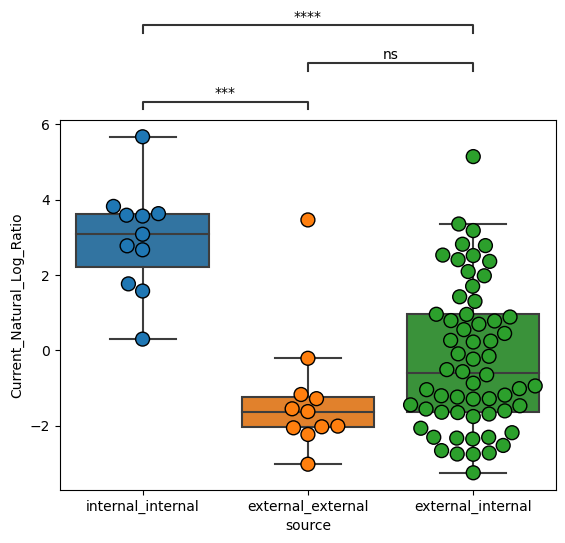

In [8]:
g = sns.boxplot(data=genera_lr, x='source', y='Current_Natural_Log_Ratio')
g = sns.swarmplot(data=genera_lr, x='source', y='Current_Natural_Log_Ratio', 
                  size=10, linewidth=1, edgecolor='k')

pairs=list(combinations(genera_lr['source'].unique(), 2))
annotator = Annotator(g, pairs, data=genera_lr, x='source', 
                      y='Current_Natural_Log_Ratio',)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

gadget_kirk_Pre vs. gadget_kirk_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.714e-01 U_stat=1.900e+01
ellen_mac_Pre vs. ellen_mac_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:7.619e-01 U_stat=1.400e+01
asami_beryl_Pre vs. asami_beryl_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.714e-01 U_stat=5.000e+00
johnny_rene_Pre vs. johnny_rene_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:7.143e-02 U_stat=1.400e+01
martina_abel_Pre vs. martina_abel_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.905e-01 U_stat=1.600e+01
reba_chrome_Pre vs. reba_chrome_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:4.762e-01 U_stat=8.000e+00
tammy_bane_Pre vs. tammy_bane_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:2.381e-02 U_stat=0.000e+00
kenny_toph_Pre vs. kenny_toph_Post: Mann-Whitney-Wilcoxon te

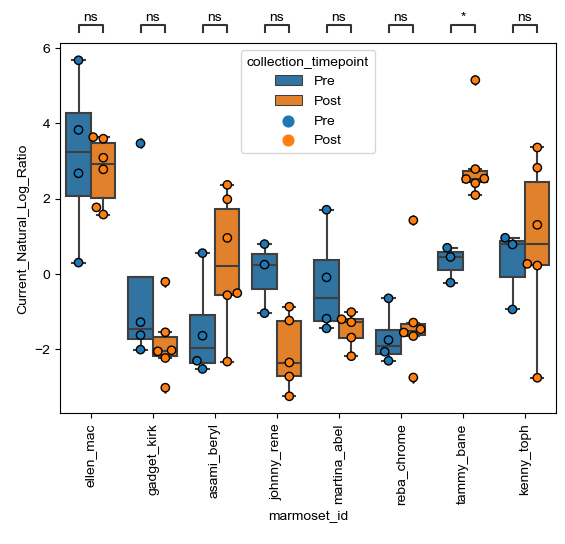

In [5]:
genera_lr_noT = genera_lr[genera_lr['collection_timepoint'].isin(['Pre', 'Post'])]
g = sns.boxplot(data=genera_lr_noT, x='marmoset_id', y='Current_Natural_Log_Ratio', hue='collection_timepoint')
g = sns.swarmplot(data=genera_lr_noT, x='marmoset_id', y='Current_Natural_Log_Ratio', hue='collection_timepoint',
                  size=6, linewidth=1, edgecolor='k', dodge=True)

pairs=[((marm, 'Pre'), (marm, 'Post')) for marm in genera_lr_noT['marmoset_id'].unique()]
annotator = Annotator(g, pairs, data=genera_lr_noT, x='marmoset_id',
                      y='Current_Natural_Log_Ratio', hue='collection_timepoint')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

g.set_xticklabels(genera_lr_noT['marmoset_id'].unique(), rotation=90)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/genuslr_bymarmid_prepost.svg')

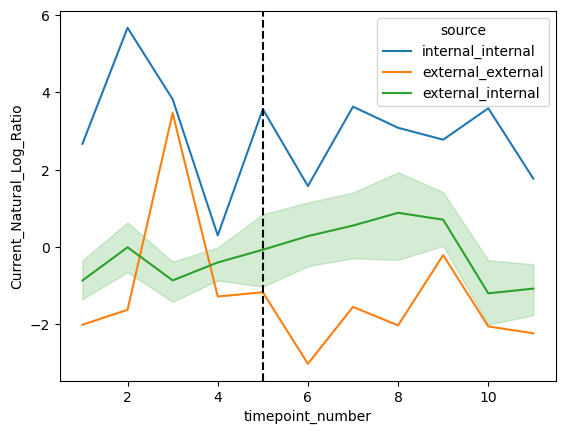

In [9]:
g = sns.lineplot(data=genera_lr, x='timepoint_number', y='Current_Natural_Log_Ratio', 
                 hue='source', ci=68)
g.axvline(5, linestyle='--', color='k') #diet transition timepoint

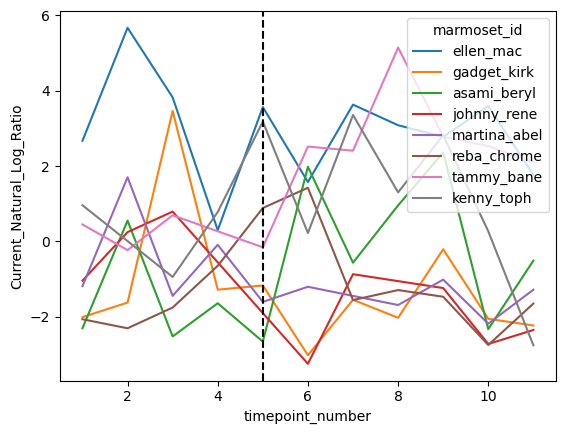

In [10]:
ax = sns.lineplot(data=genera_lr, x='timepoint_number', y='Current_Natural_Log_Ratio', 
             hue="marmoset_id")
ax.axvline(5, linestyle='--', color='k') #diet transition timepoint
#ellen_mac and tammy_bane seem to be doing their own thing, opposite the others

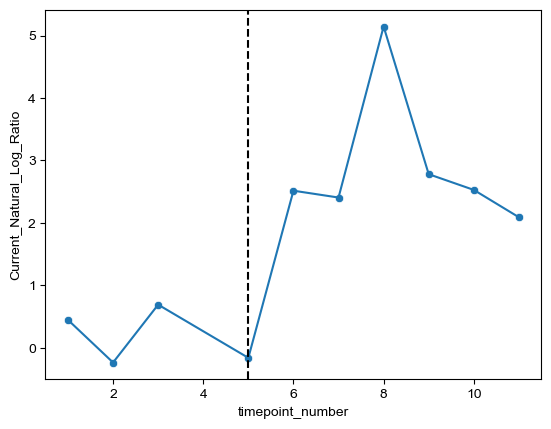

In [11]:
ax = sns.lineplot(data=genera_lr[genera_lr['marmoset_id']=='tammy_bane'], 
                  x='timepoint_number', y='Current_Natural_Log_Ratio')
ax = sns.scatterplot(data=genera_lr[genera_lr['marmoset_id']=='tammy_bane'], 
                  x='timepoint_number', y='Current_Natural_Log_Ratio')
ax.axvline(5, linestyle='--', color='k') #diet transition timepoint

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/TB_generalr.svg', dpi=150, bbox_inches='tight')

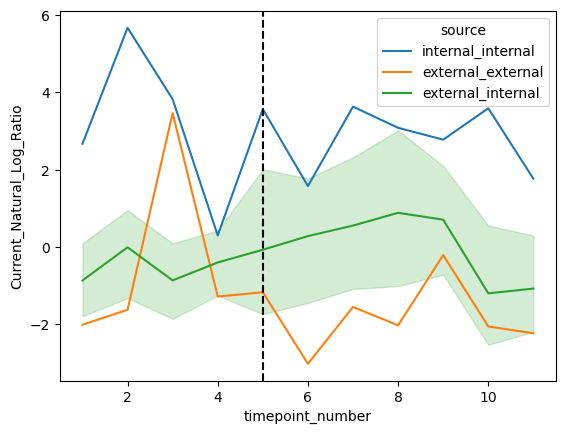

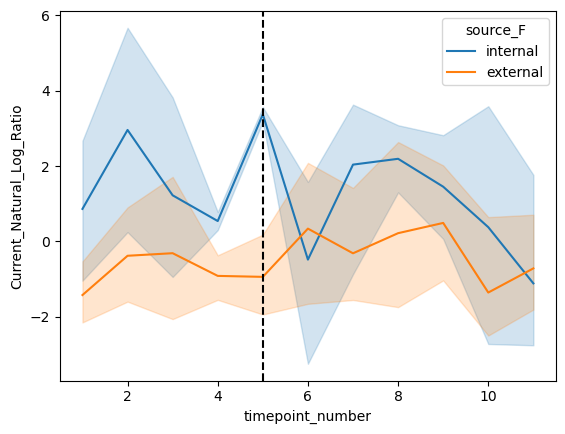

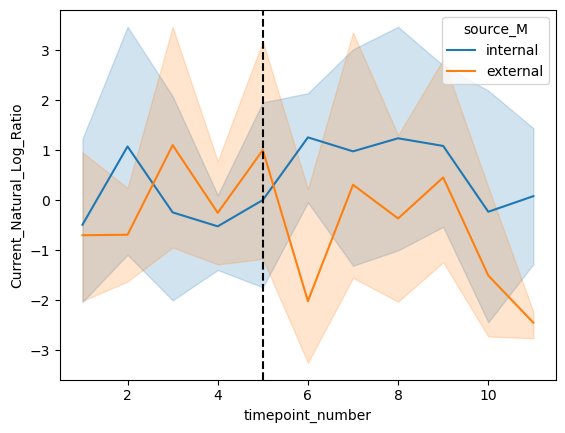

In [11]:
for x in ['source', 'source_F', 'source_M']:
    ax = sns.lineplot(data=genera_lr, x='timepoint_number', y='Current_Natural_Log_Ratio', 
             hue=x)
    ax.axvline(5, linestyle='--', color='k') #diet transition timepoint
    plt.show()

### based on source of male in the pair

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

internal vs. external: Mann-Whitney-Wilcoxon test two-sided, P_val:1.012e-01 U_stat=9.380e+02


(<AxesSubplot: xlabel='source_M', ylabel='Current_Natural_Log_Ratio'>,
 [<statannotations.Annotation.Annotation at 0x7fee1e49c100>])

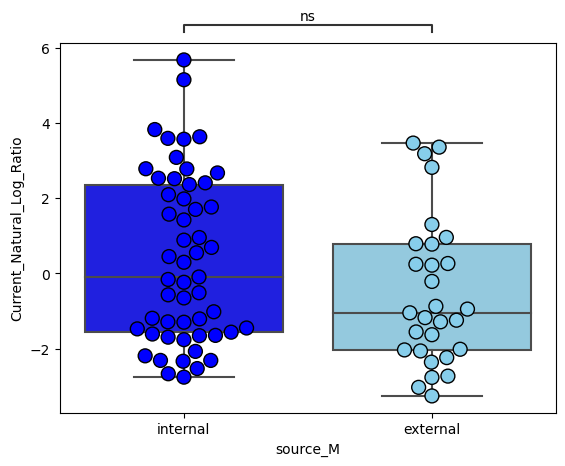

In [12]:
g = sns.boxplot(data=genera_lr, x='source_M', y='Current_Natural_Log_Ratio',
            palette=['blue', 'skyblue'])
g = sns.swarmplot(data=genera_lr, x='source_M', y='Current_Natural_Log_Ratio', 
                  size=10, palette=['blue', 'skyblue'], linewidth=1, edgecolor='k')

pairs=list(combinations(genera_lr['source_M'].unique(), 2))
annotator = Annotator(g, pairs, data=genera_lr, x='source_M', 
                      y='Current_Natural_Log_Ratio',)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

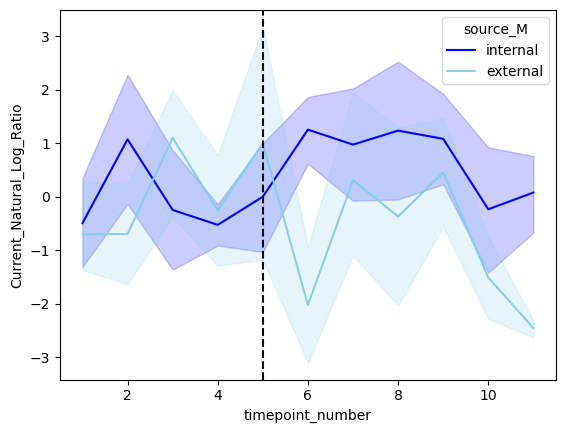

In [13]:
g = sns.lineplot(data=genera_lr, x='timepoint_number', y='Current_Natural_Log_Ratio',
            hue='source_M', palette=['blue', 'skyblue'], ci=68)
g.axvline(5, linestyle='--', color='k') #diet transition timepoint

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

external_Pre vs. external_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.137e-01 U_stat=1.170e+02
internal_Pre vs. internal_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:2.295e-01 U_stat=2.180e+02


(<AxesSubplot: xlabel='source_M', ylabel='Current_Natural_Log_Ratio'>,
  <statannotations.Annotation.Annotation at 0x7fee1eed3c40>])

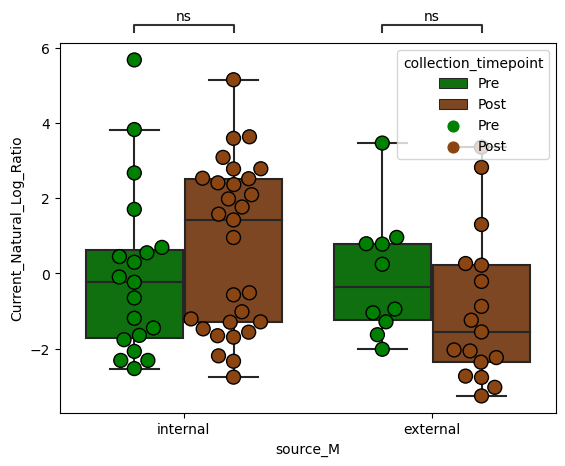

In [14]:
g = sns.boxplot(data=genera_lr, x='source_M', y='Current_Natural_Log_Ratio',
            hue='collection_timepoint', hue_order=['Pre', 'Post'],
                palette=['green', 'saddlebrown'])
g = sns.swarmplot(data=genera_lr, x='source_M', y='Current_Natural_Log_Ratio',
                  hue='collection_timepoint', hue_order=['Pre', 'Post'], dodge=True,
                  size=10, palette=['green', 'saddlebrown'], linewidth=1, edgecolor='k')

pairs=[((clar, 'Pre'), (clar, 'Post')) for clar in genera_lr['source_M'].unique()]
annotator = Annotator(g, pairs, data=genera_lr, x='source_M', hue_order=['Pre', 'Post'],
                      y='Current_Natural_Log_Ratio', hue='collection_timepoint')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

### based on source of female in the pair

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

internal vs. external: Mann-Whitney-Wilcoxon test two-sided, P_val:2.109e-03 U_stat=1.086e+03


(<AxesSubplot: xlabel='source_F', ylabel='Current_Natural_Log_Ratio'>,
 [<statannotations.Annotation.Annotation at 0x7fee1f32bf40>])

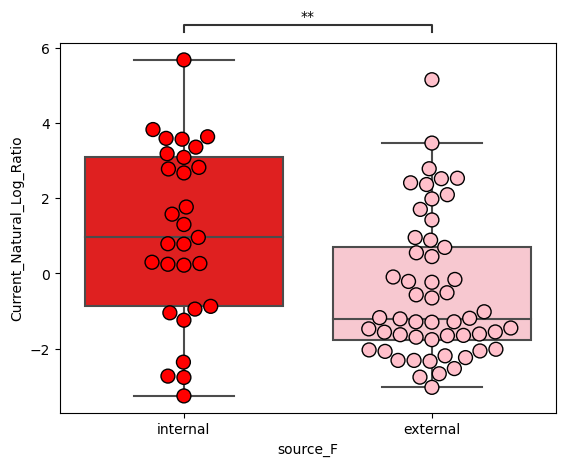

In [15]:
g = sns.boxplot(data=genera_lr, x='source_F', y='Current_Natural_Log_Ratio',
            palette=['red', 'pink'])
g = sns.swarmplot(data=genera_lr, x='source_F', y='Current_Natural_Log_Ratio', 
                  size=10, palette=['red', 'pink'], linewidth=1, edgecolor='k')

pairs=list(combinations(genera_lr['source_F'].unique(), 2))
annotator = Annotator(g, pairs, data=genera_lr, x='source_F', 
                      y='Current_Natural_Log_Ratio',)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

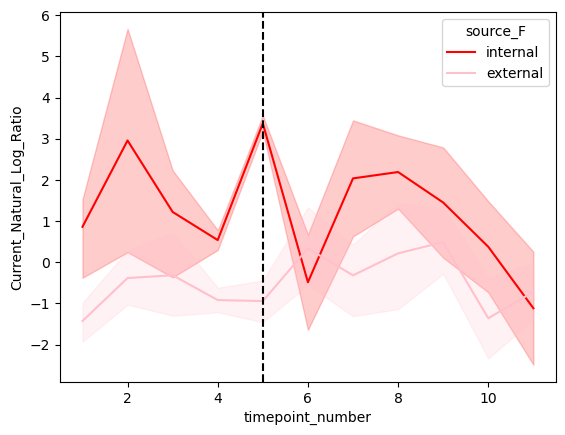

In [16]:
g = sns.lineplot(data=genera_lr, x='timepoint_number', y='Current_Natural_Log_Ratio',
            hue='source_F', palette=['red', 'pink'], ci=68)
g.axvline(5, linestyle='--', color='k') #diet transition timepoint

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

external_Pre vs. external_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:5.271e-01 U_stat=2.450e+02
internal_Pre vs. internal_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:6.695e-01 U_stat=9.400e+01


(<AxesSubplot: xlabel='source_F', ylabel='Current_Natural_Log_Ratio'>,
  <statannotations.Annotation.Annotation at 0x7fee1f440a60>])

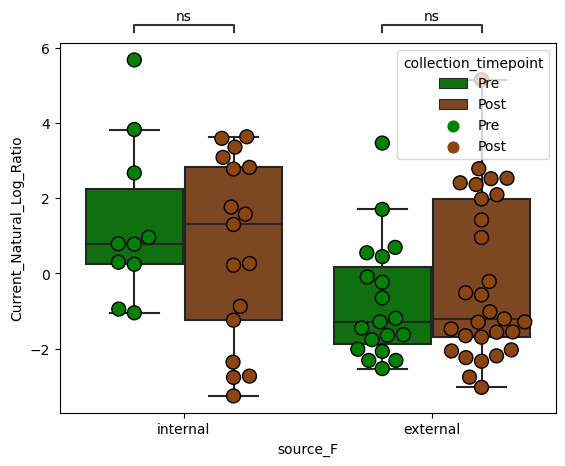

In [17]:
g = sns.boxplot(data=genera_lr, x='source_F', y='Current_Natural_Log_Ratio',
            hue='collection_timepoint', hue_order=['Pre', 'Post'],
                palette=['green', 'saddlebrown'])
g = sns.swarmplot(data=genera_lr, x='source_F', y='Current_Natural_Log_Ratio',
                  hue='collection_timepoint', hue_order=['Pre', 'Post'], dodge=True,
                  size=10, palette=['green', 'saddlebrown'], linewidth=1, edgecolor='k')

pairs=[((clar, 'Pre'), (clar, 'Post')) for clar in genera_lr['source_F'].unique()]
annotator = Annotator(g, pairs, data=genera_lr, x='source_F', hue_order=['Pre', 'Post'],
                      y='Current_Natural_Log_Ratio', hue='collection_timepoint')
annotator.configure(test='Wilcoxon', text_format='star', loc='outside')
annotator.apply_and_annotate()

## Species Level Log Ratio
(Bifidobacterium callitrichos + Prevotella copri + Bifidobacterium reuteri)
***
(Escherichia coli + Bacteroides finegoldii + Bacteroides stercoris + Phocaeicola massiliensis)

In [12]:
species_lr = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/RPCA/merged_6species_lr.tsv', sep='\t', index_col=0)
species_lr.head()
#it is actually 7 species...

Current_Natural_Log_Ratio collection_timepoint  \
#SampleID                                                       
14577.EM.TP1                    3.240056                  Pre   
14577.GK.TP1                   -4.366591                  Pre   
14577.AB.TP1                   -3.228913                  Pre   
14577.JR.TP1                   -0.728973                  Pre   
14577.MA.TP11                  -2.098200                 Post   

              collection_timestamp date_collected  description          diet  \
#SampleID                                                                      
14577.EM.TP1    6/2/202112:00:00PM         6/2/21          NaN        pellet   
14577.GK.TP1    6/2/202112:00:00PM         6/2/21          NaN        pellet   
14577.AB.TP1    6/2/202112:00:00PM         6/2/21          NaN  gelandpellet   
14577.JR.TP1    6/2/202112:00:00PM         6/2/21          NaN  gelandpellet   
14577.MA.TP11  7/11/202212:00:00PM        7/11/22          NaN           gel   

               elevation elevation_units           empo_1  empo_2  ...  \
#SampleID                                                          ...   
14577.EM.TP1         193          meters  Host-associated  Animal  ...   
14577.GK.TP1         193          meters  Host-associated  Animal  ...   
14577.AB.TP1         193          meters  Host-associated  Animal  ...   
14577.JR.TP1         193          meters  Host-associated  Animal  ...   
14577.MA.TP11        193          meters  Host-associated  Animal  ...   

                     scientific_name            sex sex_of_pair         site  \
#SampleID                                                                      
14577.EM.TP1       primatemetagenome  notapplicable          MF  EliottField   
14577.GK.TP1   marmosetgutmetagenome  notapplicable          MF  EliottField   
14577.AB.TP1       primatemetagenome  notapplicable          MF  EliottField   
14577.JR.TP1       primatemetagenome  notapplicable          MF  EliottField   
14577.MA.TP11  marmosetgutmetagenome  notapplicable          MF  EliottField   

              taxon_id           time_collected timepoint_group  \
#SampleID                                                         
14577.EM.TP1   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.GK.TP1   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.AB.TP1   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.JR.TP1   1441288  lightsontonoon(ZT0-ZT6)             TP1   
14577.MA.TP11  1441288  lightsontonoon(ZT0-ZT6)            TP11   

                                               title    tube_id  \
#SampleID                                                         
14577.EM.TP1   MarmosetDietChange-ACPResidentProject  363243236   
14577.GK.TP1   MarmosetDietChange-ACPResidentProject  363243245   
14577.AB.TP1   MarmosetDietChange-ACPResidentProject  363243238   
14577.JR.TP1   MarmosetDietChange-ACPResidentProject  363243246   
14577.MA.TP11  MarmosetDietChange-ACPResidentProject  363203965   

              timepoint_number  
#SampleID                       
14577.EM.TP1                 1  
14577.GK.TP1                 1  
14577.AB.TP1                 1  
14577.JR.TP1                 1  
14577.MA.TP11               11  

[5 rows x 51 columns]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pre vs. Post: Mann-Whitney-Wilcoxon test two-sided, P_val:8.747e-01 U_stat=6.520e+02


(<AxesSubplot: xlabel='collection_timepoint', ylabel='Current_Natural_Log_Ratio'>,
 [<statannotations.Annotation.Annotation at 0x7fee1e500070>])

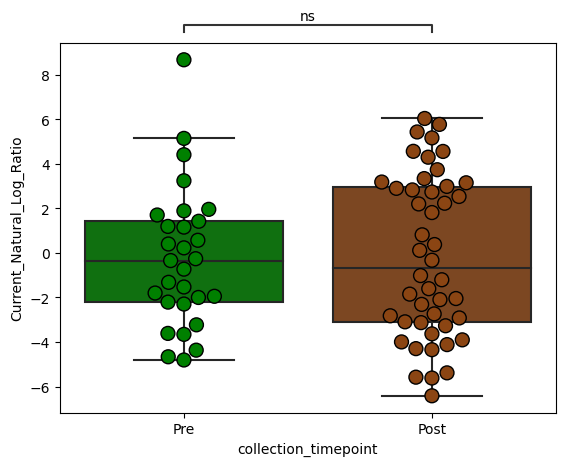

In [19]:
g = sns.boxplot(data=species_lr, x='collection_timepoint', y='Current_Natural_Log_Ratio',
            order=['Pre', 'Post'], palette=['green', 'saddlebrown'])
g = sns.swarmplot(data=species_lr[species_lr['collection_timepoint'].isin(['Pre', 'Post'])], 
                    x='collection_timepoint', y='Current_Natural_Log_Ratio', size=10,
                    palette=['green', 'saddlebrown'], linewidth=1, edgecolor='k')
pairs=[("Pre", "Post")]
annotator = Annotator(g, pairs, data=species_lr, x='collection_timepoint', 
                      y='Current_Natural_Log_Ratio', order=['Pre', 'Post'])
annotator.configure(test='Wilcoxon', text_format='star', loc='outside')
annotator.apply_and_annotate()
#Post appears bimodal

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Pre vs. Post: Mann-Whitney-Wilcoxon test two-sided, P_val:4.758e-01 U_stat=4.170e+02


(<AxesSubplot: xlabel='collection_timepoint', ylabel='Current_Natural_Log_Ratio'>,
 [<statannotations.Annotation.Annotation at 0x7fee1e912cd0>])

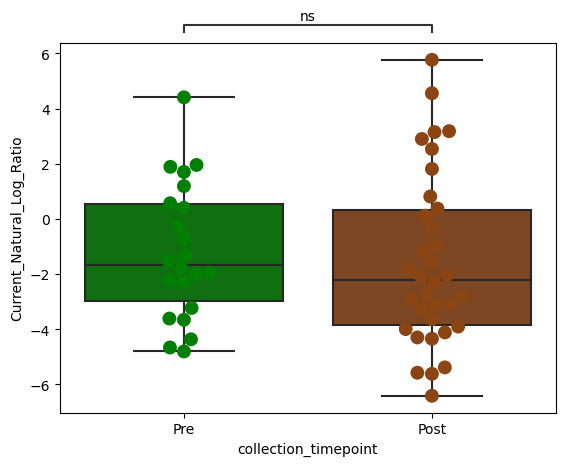

In [20]:
g = sns.boxplot(data=species_lr[~(species_lr['marmoset_id'].isin(['ellen_mac', 'tammy_bane']))], 
                x='collection_timepoint', y='Current_Natural_Log_Ratio',
            order=['Pre', 'Post'], palette=['green', 'saddlebrown'])
g = sns.swarmplot(data=species_lr[~(species_lr['marmoset_id'].isin(['ellen_mac', 'tammy_bane']))], 
                x='collection_timepoint', y='Current_Natural_Log_Ratio', size=10,
            order=['Pre', 'Post'], palette=['green', 'saddlebrown'])

pairs=[("Pre", "Post")]
annotator = Annotator(g, pairs, data=species_lr[~(species_lr['marmoset_id'].isin(['ellen_mac', 'tammy_bane']))], 
                      x='collection_timepoint', 
                      y='Current_Natural_Log_Ratio', order=['Pre', 'Post'])
annotator.configure(test='Wilcoxon', text_format='star', loc='outside')
annotator.apply_and_annotate()
#Post no longer appears bimodal, but still not significantly different

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

internal_internal vs. external_external: Mann-Whitney-Wilcoxon test two-sided, P_val:3.043e-04 U_stat=1.160e+02
external_external vs. external_internal: Mann-Whitney-Wilcoxon test two-sided, P_val:4.115e-02 U_stat=2.010e+02
internal_internal vs. external_internal: Mann-Whitney-Wilcoxon test two-sided, P_val:1.035e-05 U_stat=6.080e+02


(<AxesSubplot: xlabel='source', ylabel='Current_Natural_Log_Ratio'>,
  <statannotations.Annotation.Annotation at 0x7fee1e998a90>])

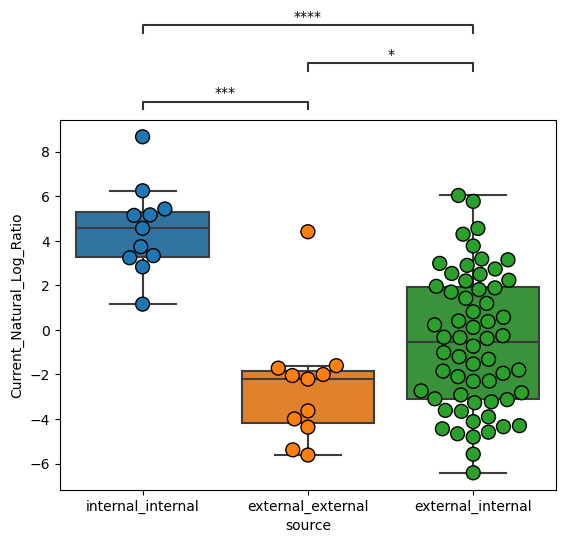

In [21]:
g = sns.boxplot(data=species_lr, x='source', y='Current_Natural_Log_Ratio')
g = sns.swarmplot(data=species_lr, x='source', y='Current_Natural_Log_Ratio', 
                  size=10, linewidth=1, edgecolor='k')

pairs=list(combinations(species_lr['source'].unique(), 2))
annotator = Annotator(g, pairs, data=species_lr, x='source', 
                      y='Current_Natural_Log_Ratio',)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/statannotations/_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

gadget_kirk_Pre vs. gadget_kirk_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:3.524e-01 U_stat=1.700e+01
ellen_mac_Pre vs. ellen_mac_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:9.143e-01 U_stat=1.100e+01
asami_beryl_Pre vs. asami_beryl_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.714e-01 U_stat=5.000e+00
johnny_rene_Pre vs. johnny_rene_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:3.571e-02 U_stat=1.500e+01
martina_abel_Pre vs. martina_abel_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:6.349e-02 U_stat=1.800e+01
reba_chrome_Pre vs. reba_chrome_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.714e-01 U_stat=5.000e+00
tammy_bane_Pre vs. tammy_bane_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:2.381e-02 U_stat=0.000e+00
kenny_toph_Pre vs. kenny_toph_Post: Mann-Whitney-Wilcoxon te

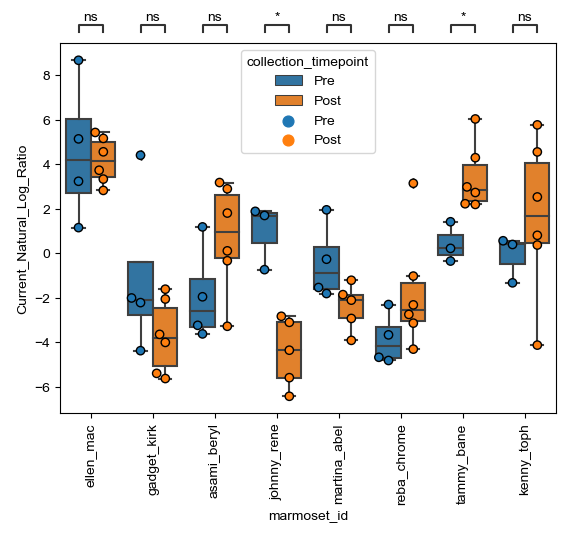

In [20]:
species_lr_noT = species_lr[species_lr['collection_timepoint'].isin(['Pre', 'Post'])]
g = sns.boxplot(data=species_lr_noT, x='marmoset_id', y='Current_Natural_Log_Ratio', hue='collection_timepoint')
g = sns.swarmplot(data=species_lr_noT, x='marmoset_id', y='Current_Natural_Log_Ratio', hue='collection_timepoint',
                  size=6, linewidth=1, edgecolor='k', dodge=True)

pairs=[((marm, 'Pre'), (marm, 'Post')) for marm in species_lr_noT['marmoset_id'].unique()]
annotator = Annotator(g, pairs, data=species_lr_noT, x='marmoset_id',
                      y='Current_Natural_Log_Ratio', hue='collection_timepoint')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

g.set_xticklabels(species_lr_noT['marmoset_id'].unique(), rotation=90)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/specieslr_bymarmid_prepost.svg')

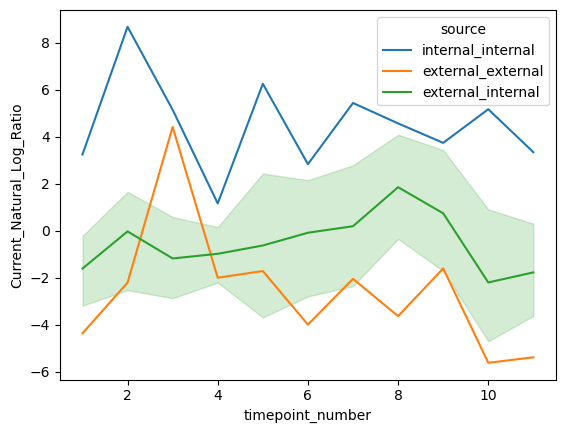

In [22]:
g = sns.lineplot(data=species_lr, x='timepoint_number', y='Current_Natural_Log_Ratio', hue='source')

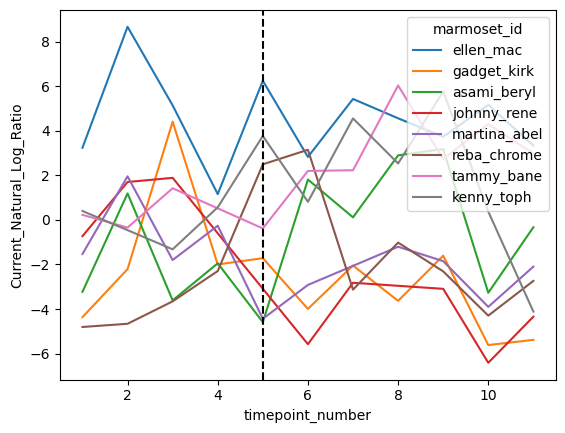

In [23]:
ax = sns.lineplot(data=species_lr, x='timepoint_number', y='Current_Natural_Log_Ratio', 
             hue="marmoset_id")
ax.axvline(5, linestyle='--', color='k') #diet transition timepoint
#ellen_mac and tammy_bane seem to be doing their own thing, opposite the others

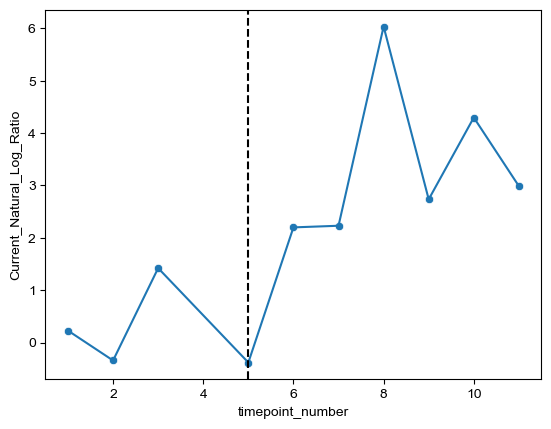

In [13]:
ax = sns.lineplot(data=species_lr[genera_lr['marmoset_id']=='tammy_bane'], 
                  x='timepoint_number', y='Current_Natural_Log_Ratio')
ax = sns.scatterplot(data=species_lr[genera_lr['marmoset_id']=='tammy_bane'], 
                  x='timepoint_number', y='Current_Natural_Log_Ratio')
ax.axvline(5, linestyle='--', color='k') #diet transition timepoint

plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/TB_specieslr.svg', dpi=150, bbox_inches='tight')

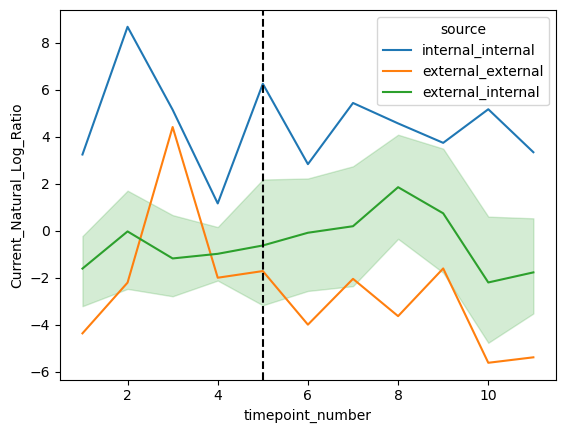

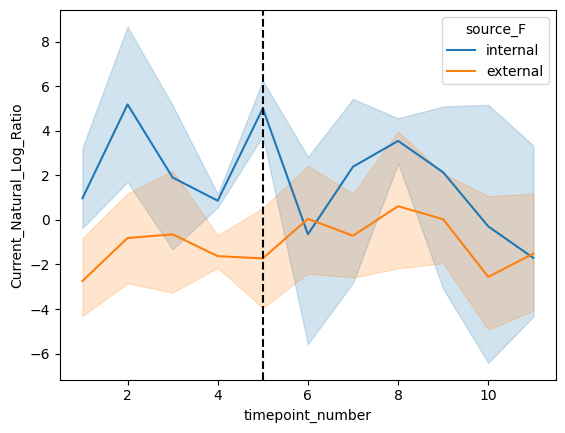

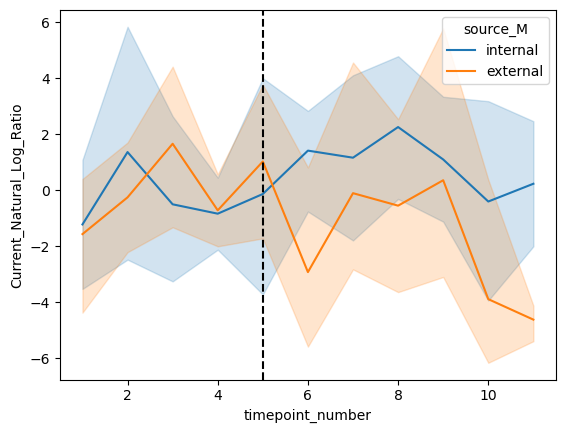

In [24]:
for x in ['source', 'source_F', 'source_M']:
    ax = sns.lineplot(data=species_lr, x='timepoint_number', y='Current_Natural_Log_Ratio', 
             hue=x)
    ax.axvline(5, linestyle='--', color='k') #diet transition timepoint
    plt.show()

### based on source of male in the pair

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

internal vs. external: Mann-Whitney-Wilcoxon test two-sided, P_val:5.859e-02 U_stat=9.640e+02


(<AxesSubplot: xlabel='source_M', ylabel='Current_Natural_Log_Ratio'>,
 [<statannotations.Annotation.Annotation at 0x7fee1ff2ceb0>])

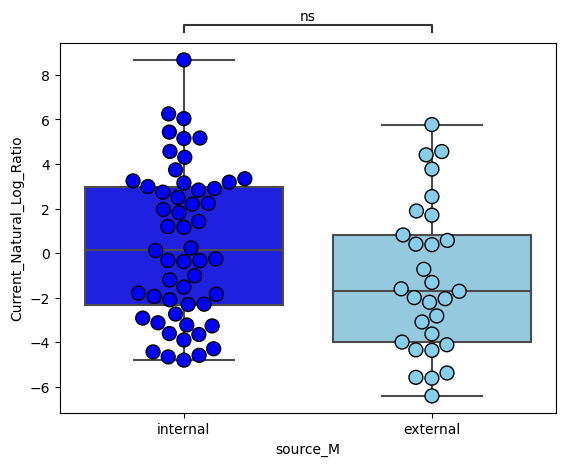

In [25]:
g = sns.boxplot(data=species_lr, x='source_M', y='Current_Natural_Log_Ratio',
            palette=['blue', 'skyblue'])
g = sns.swarmplot(data=species_lr, x='source_M', y='Current_Natural_Log_Ratio', 
                  size=10, palette=['blue', 'skyblue'], linewidth=1, edgecolor='k')

pairs=list(combinations(species_lr['source_M'].unique(), 2))
annotator = Annotator(g, pairs, data=species_lr, x='source_M', 
                      y='Current_Natural_Log_Ratio',)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

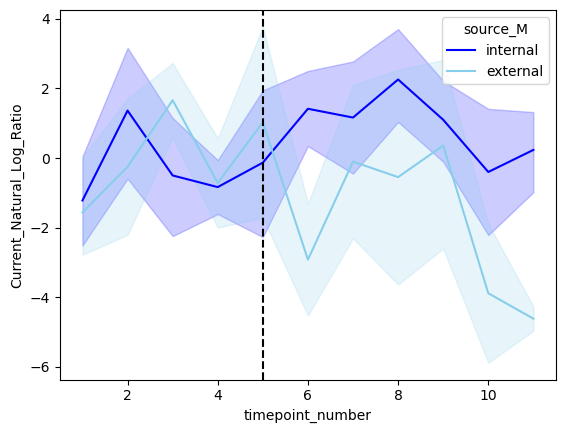

In [26]:
g = sns.lineplot(data=species_lr, x='timepoint_number', y='Current_Natural_Log_Ratio',
            hue='source_M', palette=['blue', 'skyblue'], ci=68)
g.axvline(5, linestyle='--', color='k') #diet transition timepoint

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

external_Pre vs. external_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.027e-01 U_stat=1.180e+02
internal_Pre vs. internal_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:1.458e-01 U_stat=2.060e+02


(<AxesSubplot: xlabel='source_M', ylabel='Current_Natural_Log_Ratio'>,
  <statannotations.Annotation.Annotation at 0x7fee2085eb80>])

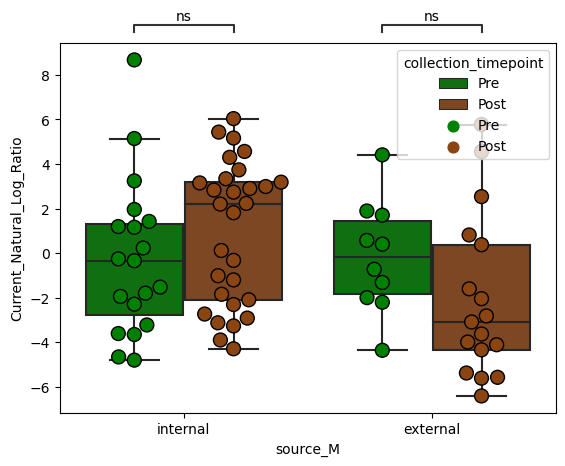

In [27]:
g = sns.boxplot(data=species_lr, x='source_M', y='Current_Natural_Log_Ratio',
            hue='collection_timepoint', hue_order=['Pre', 'Post'],
                palette=['green', 'saddlebrown'])
g = sns.swarmplot(data=species_lr, x='source_M', y='Current_Natural_Log_Ratio',
                  hue='collection_timepoint', hue_order=['Pre', 'Post'], dodge=True,
                  size=10, palette=['green', 'saddlebrown'], linewidth=1, edgecolor='k')

pairs=[((clar, 'Pre'), (clar, 'Post')) for clar in species_lr['source_M'].unique()]
annotator = Annotator(g, pairs, data=species_lr, x='source_M', hue_order=['Pre', 'Post'],
                      y='Current_Natural_Log_Ratio', hue='collection_timepoint')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

### based on source of female in the pair

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

internal vs. external: Mann-Whitney-Wilcoxon test two-sided, P_val:1.790e-03 U_stat=1.091e+03


(<AxesSubplot: xlabel='source_F', ylabel='Current_Natural_Log_Ratio'>,
 [<statannotations.Annotation.Annotation at 0x7fee20d2d880>])

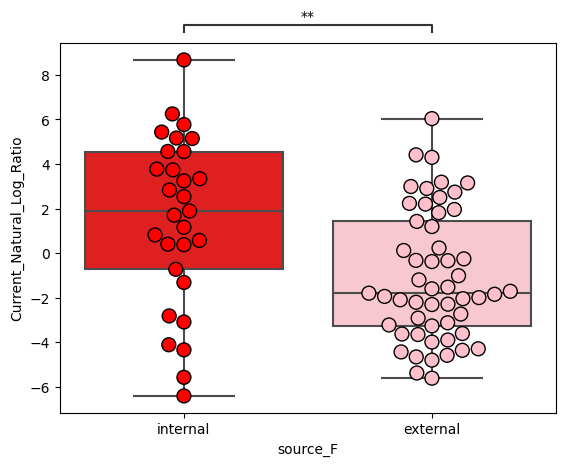

In [28]:
g = sns.boxplot(data=species_lr, x='source_F', y='Current_Natural_Log_Ratio',
            palette=['red', 'pink'])
g = sns.swarmplot(data=species_lr, x='source_F', y='Current_Natural_Log_Ratio', 
                  size=10, palette=['red', 'pink'], linewidth=1, edgecolor='k')

pairs=list(combinations(species_lr['source_F'].unique(), 2))
annotator = Annotator(g, pairs, data=species_lr, x='source_F', 
                      y='Current_Natural_Log_Ratio',)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

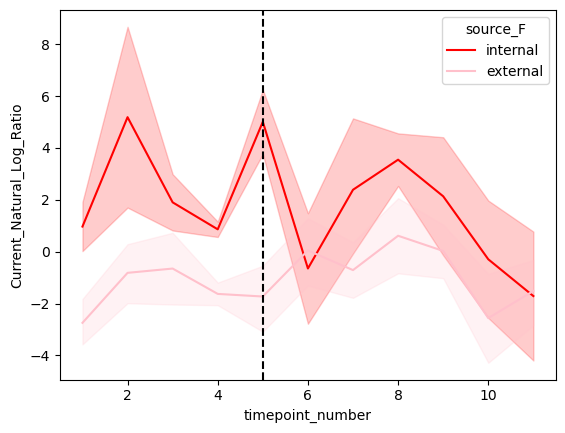

In [29]:
g = sns.lineplot(data=species_lr, x='timepoint_number', y='Current_Natural_Log_Ratio',
            hue='source_F', palette=['red', 'pink'], ci=68)
g.axvline(5, linestyle='--', color='k') #diet transition timepoint

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

external_Pre vs. external_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:4.735e-01 U_stat=2.410e+02
internal_Pre vs. internal_Post: Mann-Whitney-Wilcoxon test two-sided, P_val:7.824e-01 U_stat=9.100e+01


(<AxesSubplot: xlabel='source_F', ylabel='Current_Natural_Log_Ratio'>,
  <statannotations.Annotation.Annotation at 0x7fee21d40100>])

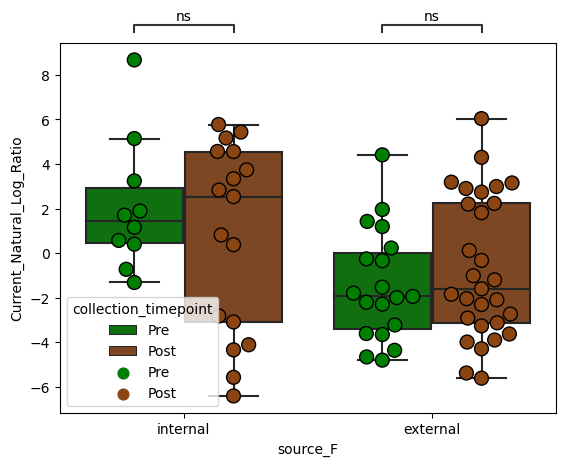

In [35]:
g = sns.boxplot(data=species_lr, x='source_F', y='Current_Natural_Log_Ratio',
            hue='collection_timepoint', hue_order=['Pre', 'Post'],
                palette=['green', 'saddlebrown'])
g = sns.swarmplot(data=species_lr, x='source_F', y='Current_Natural_Log_Ratio',
                  hue='collection_timepoint', hue_order=['Pre', 'Post'], dodge=True,
                  size=10, palette=['green', 'saddlebrown'], linewidth=1, edgecolor='k')

pairs=[((clar, 'Pre'), (clar, 'Post')) for clar in species_lr['source_F'].unique()]
annotator = Annotator(g, pairs, data=species_lr, x='source_F', hue_order=['Pre', 'Post'],
                      y='Current_Natural_Log_Ratio', hue='collection_timepoint')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()
#Wilcoxon doesn't work becuase they are not completely equal

### Looking at relative abundances

In [14]:
metadata = pd.read_csv('../data/Microbiome/14577_fixed.txt', sep='\t', index_col=0)
metadata.head()

Pre_Post collection_timepoint   keep collection_timestamp  \
sample_name                                                               
14577.AB.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.AB.TP10     Post                 LTFU  False  4/14/202212:00:00PM   
14577.AB.TP11     Post                 LTFU  False  7/11/202212:00:00PM   
14577.AB.TP2       Pre                  Pre   True   6/3/202112:00:00PM   
14577.AB.TP3       Pre                  Pre   True   6/8/202112:00:00PM   

              date_collected  description          diet  elevation  \
sample_name                                                          
14577.AB.TP1          6/2/21          NaN  gelandpellet        193   
14577.AB.TP10        4/14/22          NaN           gel        193   
14577.AB.TP11        7/11/22          NaN           gel        193   
14577.AB.TP2          6/3/21          NaN  gelandpellet        193   
14577.AB.TP3          6/8/21          NaN  gelandpellet        193   

              elevation_units           empo_1  ...     scientific_name  \
sample_name                                     ...                       
14577.AB.TP1           meters  Host-associated  ...  primate metagenome   
14577.AB.TP10          meters  Host-associated  ...  primate metagenome   
14577.AB.TP11          meters  Host-associated  ...  primate metagenome   
14577.AB.TP2           meters  Host-associated  ...  primate metagenome   
14577.AB.TP3           meters  Host-associated  ...  primate metagenome   

                          sex sex_of_pair         site taxon_id  \
sample_name                                                       
14577.AB.TP1   not applicable          MF  EliottField  1441288   
14577.AB.TP10  not applicable          MF  EliottField  1441288   
14577.AB.TP11  not applicable          MF  EliottField  1441288   
14577.AB.TP2   not applicable          MF  EliottField  1441288   
14577.AB.TP3   not applicable          MF  EliottField  1441288   

                           time_collected timepoint_group  \
sample_name                                                 
14577.AB.TP1   lights on to noon(ZT0-ZT6)             TP1   
14577.AB.TP10  lights on to noon(ZT0-ZT6)            TP10   
14577.AB.TP11  lights on to noon(ZT0-ZT6)            TP11   
14577.AB.TP2   lights on to noon(ZT0-ZT6)             TP2   
14577.AB.TP3   lights on to noon(ZT0-ZT6)             TP3   

                                               title    tube_id  \
sample_name                                                       
14577.AB.TP1   MarmosetDietChange-ACPResidentProject  363243238   
14577.AB.TP10  MarmosetDietChange-ACPResidentProject  363243336   
14577.AB.TP11  MarmosetDietChange-ACPResidentProject  363243344   
14577.AB.TP2   MarmosetDietChange-ACPResidentProject  363243257   
14577.AB.TP3   MarmosetDietChange-ACPResidentProject  363243266   

              timepoint_number  
sample_name                     
14577.AB.TP1                 1  
14577.AB.TP10               10  
14577.AB.TP11               11  
14577.AB.TP2                 2  
14577.AB.TP3                 3  

[5 rows x 54 columns]

In [16]:
rar_relf = pd.read_csv('../data/Microbiome/pool_filtered_pergenome/filt_167000rar_core_diversity/rarefied_relative_frequency_table.tsv', 
                       sep='\t', skiprows=1, index_col=0)
rar_relf.head()

14577.EM.TP1  14577.GK.TP1  14577.AB.TP1  14577.JR.TP1  \
#OTU ID                                                              
G000006605      0.000000      0.000000      0.000000           0.0   
G000006745      0.000000      0.000000      0.000006           0.0   
G000006785      0.000000      0.000000      0.000000           0.0   
G000006845      0.000006      0.000000      0.000000           0.0   
G000006865      0.000144      0.000024      0.000611           0.0   

            14577.MA.TP11  14577.MA.TP1  14577.RC.TP1  14577.TB.TP1  \
#OTU ID                                                               
G000006605       0.000000       0.00000      0.000000           0.0   
G000006745       0.000000       0.00000      0.000000           0.0   
G000006785       0.000012       0.00000      0.000000           0.0   
G000006845       0.000018       0.00000      0.000000           0.0   
G000006865       0.000162       0.00021      0.000012           0.0   

            14577.TK.TP1  14577.GK.TP4  ...  14577.EM.TP4  14577.JR.TP3  \
#OTU ID                                 ...                               
G000006605      0.000000      0.000000  ...      0.000012      0.000000   
G000006745      0.000000      0.000012  ...      0.000012      0.000000   
G000006785      0.000000      0.000000  ...      0.000006      0.000000   
G000006845      0.000000      0.000000  ...      0.000000      0.000006   
G000006865      0.000018      0.000048  ...      0.000000      0.000006   

            14577.AB.TP3  14577.GK.TP2  14577.JR.TP6  14577.MA.TP2  \
#OTU ID                                                              
G000006605      0.000006      0.000000      0.000000      0.000000   
G000006745      0.000006      0.000000      0.000000      0.000000   
G000006785      0.000000      0.000000      0.000000      0.000000   
G000006845      0.000000      0.000000      0.000000      0.000000   
G000006865      0.000006      0.000012      0.000228      0.000006   

            14577.AB.TP4  14577.GK.TP6  14577.RC.TP7  14577.TB.TP5  
#OTU ID                                                             
G000006605      0.000000      0.000000      0.000000      0.000000  
G000006745      0.000000      0.000000      0.000000      0.000000  
G000006785      0.000000      0.000000      0.000000      0.000000  
G000006845      0.000000      0.000006      0.000000      0.000000  
G000006865      0.000012      0.006749      0.000353      0.000138  

[5 rows x 81 columns]

In [41]:
taxonomy = pd.read_csv('../../shotgun_scripts/woltka_v2_taxonomy.txt', sep='\t')
taxonomy.head()

Feature ID                                              Taxon
0  G000005825  d__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...
1  G000006175  d__Archaea; p__Methanobacteriota_A; c__Methano...
2  G000006605  d__Bacteria; p__Actinobacteriota; c__Actinomyc...
3  G000006725  d__Bacteria; p__Proteobacteria; c__Gammaproteo...
4  G000006745  d__Bacteria; p__Proteobacteria; c__Gammaproteo...

In [18]:
s_species = ['G000157935', 'G000741175', 'G000741695', 
                'G000006925', 'G000008865', 'G000012005', 'G000026325', 'G000026345', 
               'G000154525', 'G000183345', 'G000299455', 'G000436855', 'G000438395', 
               'G000777575', 'G000777875', 'G000778805', 'G000779535', 'G000781475', 
               'G000944855', 'G001283625', 'G007998125', 'G008273775', 'G012357415',
               'G900227605']

In [19]:
taxonomy_filt = taxonomy[taxonomy['Feature ID'].isin(s_species)]
taxonomy_filt.set_index('Feature ID', inplace=True)
taxonomy_filt.head()

Taxon
Feature ID                                                   
G000006925  d__Bacteria; p__Proteobacteria; c__Gammaproteo...
G000008865  d__Bacteria; p__Proteobacteria; c__Gammaproteo...
G000012005  d__Bacteria; p__Proteobacteria; c__Gammaproteo...
G000026325  d__Bacteria; p__Proteobacteria; c__Gammaproteo...
G000026345  d__Bacteria; p__Proteobacteria; c__Gammaproteo...

In [20]:
filt_relf_table = pd.merge(taxonomy_filt, rar_relf, left_index=True, right_index=True)
filt_relf_table = filt_relf_table.reset_index()
filt_relf_table.head()

index                                              Taxon  \
0  G000006925  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
1  G000008865  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
2  G000012005  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
3  G000026325  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
4  G000026345  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   

   14577.EM.TP1  14577.GK.TP1  14577.AB.TP1  14577.JR.TP1  14577.MA.TP11  \
0      0.000413           0.0      0.000006      0.013120       0.006539   
1      0.000479           0.0      0.000000      0.015347       0.007293   
2      0.000317           0.0      0.000000      0.011234       0.005174   
3      0.000479           0.0      0.000000      0.014329       0.006868   
4      0.000395           0.0      0.000000      0.013072       0.005976   

   14577.MA.TP1  14577.RC.TP1  14577.TB.TP1  ...  14577.EM.TP4  14577.JR.TP3  \
0      0.033790      0.001449      0.020790  ...      0.002335      0.000072   
1      0.037060      0.001605      0.023497  ...      0.002401      0.000078   
2      0.027874      0.001036      0.016455  ...      0.001910      0.000042   
3      0.036395      0.001503      0.021665  ...      0.002581      0.000066   
4      0.032108      0.001401      0.019772  ...      0.002216      0.000060   

   14577.AB.TP3  14577.GK.TP2  14577.JR.TP6  14577.MA.TP2  14577.AB.TP4  \
0      0.000030           0.0      0.000000      0.004186      0.000090   
1      0.000042           0.0      0.000006      0.004347      0.000060   
2      0.000048           0.0      0.000000      0.003305      0.000048   
3      0.000054           0.0      0.000012      0.004126      0.000072   
4      0.000054           0.0      0.000000      0.003988      0.000084   

   14577.GK.TP6  14577.RC.TP7  14577.TB.TP5  
0      0.011778      0.000293      0.013754  
1      0.012533      0.000305      0.015509  
2      0.009539      0.000263      0.011222  
3      0.012234      0.000377      0.014964  
4      0.010551      0.000269      0.013916  

[5 rows x 83 columns]

In [21]:
filt_relf_table['species'] = filt_relf_table['Taxon'].str.rsplit("s__").str[1]
filt_relf_table['species'] = filt_relf_table['species'].replace(' ', '_', regex=True)
filt_relf_table.head()

index                                              Taxon  \
0  G000006925  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
1  G000008865  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
2  G000012005  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
3  G000026325  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
4  G000026345  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   

   14577.EM.TP1  14577.GK.TP1  14577.AB.TP1  14577.JR.TP1  14577.MA.TP11  \
0      0.000413           0.0      0.000006      0.013120       0.006539   
1      0.000479           0.0      0.000000      0.015347       0.007293   
2      0.000317           0.0      0.000000      0.011234       0.005174   
3      0.000479           0.0      0.000000      0.014329       0.006868   
4      0.000395           0.0      0.000000      0.013072       0.005976   

   14577.MA.TP1  14577.RC.TP1  14577.TB.TP1  ...  14577.JR.TP3  14577.AB.TP3  \
0      0.033790      0.001449      0.020790  ...      0.000072      0.000030   
1      0.037060      0.001605      0.023497  ...      0.000078      0.000042   
2      0.027874      0.001036      0.016455  ...      0.000042      0.000048   
3      0.036395      0.001503      0.021665  ...      0.000066      0.000054   
4      0.032108      0.001401      0.019772  ...      0.000060      0.000054   

   14577.GK.TP2  14577.JR.TP6  14577.MA.TP2  14577.AB.TP4  14577.GK.TP6  \
0           0.0      0.000000      0.004186      0.000090      0.011778   
1           0.0      0.000006      0.004347      0.000060      0.012533   
2           0.0      0.000000      0.003305      0.000048      0.009539   
3           0.0      0.000012      0.004126      0.000072      0.012234   
4           0.0      0.000000      0.003988      0.000084      0.010551   

   14577.RC.TP7  14577.TB.TP5           species  
0      0.000293      0.013754  Escherichia_coli  
1      0.000305      0.015509  Escherichia_coli  
2      0.000263      0.011222  Escherichia_coli  
3      0.000377      0.014964  Escherichia_coli  
4      0.000269      0.013916  Escherichia_coli  

[5 rows x 84 columns]

In [22]:
filt_relf_table['named'] = filt_relf_table['index'].astype(str)+"_"+filt_relf_table['species'].astype(str)
filt_relf_table.head()

index                                              Taxon  \
0  G000006925  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
1  G000008865  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
2  G000012005  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
3  G000026325  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   
4  G000026345  d__Bacteria; p__Proteobacteria; c__Gammaproteo...   

   14577.EM.TP1  14577.GK.TP1  14577.AB.TP1  14577.JR.TP1  14577.MA.TP11  \
0      0.000413           0.0      0.000006      0.013120       0.006539   
1      0.000479           0.0      0.000000      0.015347       0.007293   
2      0.000317           0.0      0.000000      0.011234       0.005174   
3      0.000479           0.0      0.000000      0.014329       0.006868   
4      0.000395           0.0      0.000000      0.013072       0.005976   

   14577.MA.TP1  14577.RC.TP1  14577.TB.TP1  ...  14577.AB.TP3  14577.GK.TP2  \
0      0.033790      0.001449      0.020790  ...      0.000030           0.0   
1      0.037060      0.001605      0.023497  ...      0.000042           0.0   
2      0.027874      0.001036      0.016455  ...      0.000048           0.0   
3      0.036395      0.001503      0.021665  ...      0.000054           0.0   
4      0.032108      0.001401      0.019772  ...      0.000054           0.0   

   14577.JR.TP6  14577.MA.TP2  14577.AB.TP4  14577.GK.TP6  14577.RC.TP7  \
0      0.000000      0.004186      0.000090      0.011778      0.000293   
1      0.000006      0.004347      0.000060      0.012533      0.000305   
2      0.000000      0.003305      0.000048      0.009539      0.000263   
3      0.000012      0.004126      0.000072      0.012234      0.000377   
4      0.000000      0.003988      0.000084      0.010551      0.000269   

   14577.TB.TP5           species                        named  
0      0.013754  Escherichia_coli  G000006925_Escherichia_coli  
1      0.015509  Escherichia_coli  G000008865_Escherichia_coli  
2      0.011222  Escherichia_coli  G000012005_Escherichia_coli  
3      0.014964  Escherichia_coli  G000026325_Escherichia_coli  
4      0.013916  Escherichia_coli  G000026345_Escherichia_coli  

[5 rows x 85 columns]

In [23]:
filt_relf_table2 = filt_relf_table.set_index('named')
filt_relf_table2.drop(columns=['Taxon', 'species', 'index'], inplace=True)
filt_relf_table2.head()

14577.EM.TP1  14577.GK.TP1  14577.AB.TP1  \
named                                                                   
G000006925_Escherichia_coli      0.000413           0.0      0.000006   
G000008865_Escherichia_coli      0.000479           0.0      0.000000   
G000012005_Escherichia_coli      0.000317           0.0      0.000000   
G000026325_Escherichia_coli      0.000479           0.0      0.000000   
G000026345_Escherichia_coli      0.000395           0.0      0.000000   

                             14577.JR.TP1  14577.MA.TP11  14577.MA.TP1  \
named                                                                    
G000006925_Escherichia_coli      0.013120       0.006539      0.033790   
G000008865_Escherichia_coli      0.015347       0.007293      0.037060   
G000012005_Escherichia_coli      0.011234       0.005174      0.027874   
G000026325_Escherichia_coli      0.014329       0.006868      0.036395   
G000026345_Escherichia_coli      0.013072       0.005976      0.032108   

                             14577.RC.TP1  14577.TB.TP1  14577.TK.TP1  \
named                                                                   
G000006925_Escherichia_coli      0.001449      0.020790      0.014108   
G000008865_Escherichia_coli      0.001605      0.023497      0.015581   
G000012005_Escherichia_coli      0.001036      0.016455      0.011880   
G000026325_Escherichia_coli      0.001503      0.021665      0.014970   
G000026345_Escherichia_coli      0.001401      0.019772      0.013581   

                             14577.GK.TP4  ...  14577.EM.TP4  14577.JR.TP3  \
named                                      ...                               
G000006925_Escherichia_coli      0.000018  ...      0.002335      0.000072   
G000008865_Escherichia_coli      0.000018  ...      0.002401      0.000078   
G000012005_Escherichia_coli      0.000018  ...      0.001910      0.000042   
G000026325_Escherichia_coli      0.000024  ...      0.002581      0.000066   
G000026345_Escherichia_coli      0.000012  ...      0.002216      0.000060   

                             14577.AB.TP3  14577.GK.TP2  14577.JR.TP6  \
named                                                                   
G000006925_Escherichia_coli      0.000030           0.0      0.000000   
G000008865_Escherichia_coli      0.000042           0.0      0.000006   
G000012005_Escherichia_coli      0.000048           0.0      0.000000   
G000026325_Escherichia_coli      0.000054           0.0      0.000012   
G000026345_Escherichia_coli      0.000054           0.0      0.000000   

                             14577.MA.TP2  14577.AB.TP4  14577.GK.TP6  \
named                                                                   
G000006925_Escherichia_coli      0.004186      0.000090      0.011778   
G000008865_Escherichia_coli      0.004347      0.000060      0.012533   
G000012005_Escherichia_coli      0.003305      0.000048      0.009539   
G000026325_Escherichia_coli      0.004126      0.000072      0.012234   
G000026345_Escherichia_coli      0.003988      0.000084      0.010551   

                             14577.RC.TP7  14577.TB.TP5  
named                                                    
G000006925_Escherichia_coli      0.000293      0.013754  
G000008865_Escherichia_coli      0.000305      0.015509  
G000012005_Escherichia_coli      0.000263      0.011222  
G000026325_Escherichia_coli      0.000377      0.014964  
G000026345_Escherichia_coli      0.000269      0.013916  

[5 rows x 81 columns]

In [24]:
filt_relf_table2.index

Index(['G000006925_Escherichia_coli', 'G000008865_Escherichia_coli',
       'G000012005_Escherichia_coli', 'G000026325_Escherichia_coli',
       'G000026345_Escherichia_coli', 'G000154525_Bacteroides_stercoris',
       'G000157935_Prevotella_copri', 'G000183345_Escherichia_coli',
       'G000299455_Escherichia_coli', 'G000436855_Bacteroides_finegoldii',
       'G000438395_Phocaeicola_massiliensis',
       'G000741175_Bifidobacterium_callitrichos',
       'G000741695_Bifidobacterium_reuteri', 'G000777575_Escherichia_coli',
       'G000777875_Escherichia_coli', 'G000778805_Escherichia_coli',
       'G000779535_Escherichia_coli', 'G000781475_Escherichia_coli',
       'G000944855_Escherichia_coli', 'G001283625_Escherichia_coli',
       'G007998125_Escherichia_coli', 'G008273775_Escherichia_coli',
       'G012357415_Escherichia_coli', 'G900227605_Escherichia_coli'],
      dtype='object', name='named')

In [25]:
named_filt_rftable = pd.merge(metadata, filt_relf_table2.T, right_index=True, left_index=True )
named_filt_rftable

Pre_Post collection_timepoint   keep collection_timestamp  \
14577.AB.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.AB.TP10     Post                 LTFU  False  4/14/202212:00:00PM   
14577.AB.TP11     Post                 LTFU  False  7/11/202212:00:00PM   
14577.AB.TP2       Pre                  Pre   True   6/3/202112:00:00PM   
14577.AB.TP3       Pre                  Pre   True   6/8/202112:00:00PM   
...                ...                  ...    ...                  ...   
14577.TK.TP5       NaN           Transition  False  6/25/202112:00:00PM   
14577.TK.TP6      Post                 Post   True   7/1/202112:00:00PM   
14577.TK.TP7      Post                 Post   True   7/2/202112:00:00PM   
14577.TK.TP8      Post                 Post   True   7/9/202112:00:00PM   
14577.TK.TP9      Post                 Post   True  7/19/202112:00:00PM   

              date_collected  description          diet  elevation  \
14577.AB.TP1          6/2/21          NaN  gelandpellet        193   
14577.AB.TP10        4/14/22          NaN           gel        193   
14577.AB.TP11        7/11/22          NaN           gel        193   
14577.AB.TP2          6/3/21          NaN  gelandpellet        193   
14577.AB.TP3          6/8/21          NaN  gelandpellet        193   
...                      ...          ...           ...        ...   
14577.TK.TP5         6/25/21          NaN  gelandpellet        193   
14577.TK.TP6          7/1/21          NaN           gel        193   
14577.TK.TP7          7/2/21          NaN           gel        193   
14577.TK.TP8          7/9/21          NaN           gel        193   
14577.TK.TP9         7/19/21          NaN           gel        193   

              elevation_units           empo_1  ...  \
14577.AB.TP1           meters  Host-associated  ...   
14577.AB.TP10          meters  Host-associated  ...   
14577.AB.TP11          meters  Host-associated  ...   
14577.AB.TP2           meters  Host-associated  ...   
14577.AB.TP3           meters  Host-associated  ...   
...                       ...              ...  ...   
14577.TK.TP5           meters  Host-associated  ...   
14577.TK.TP6           meters  Host-associated  ...   
14577.TK.TP7           meters  Host-associated  ...   
14577.TK.TP8           meters  Host-associated  ...   
14577.TK.TP9           meters  Host-associated  ...   

              G000777875_Escherichia_coli G000778805_Escherichia_coli  \
14577.AB.TP1                     0.000000                    0.000000   
14577.AB.TP10                    0.000030                    0.000018   
14577.AB.TP11                    0.003928                    0.002731   
14577.AB.TP2                     0.000006                    0.000000   
14577.AB.TP3                     0.000006                    0.000006   
...                                   ...                         ...   
14577.TK.TP5                     0.000311                    0.000216   
14577.TK.TP6                     0.000024                    0.000024   
14577.TK.TP7                     0.000084                    0.000060   
14577.TK.TP8                     0.000569                    0.000401   
14577.TK.TP9                     0.000000                    0.000000   

              G000779535_Escherichia_coli G000781475_Escherichia_coli  \
14577.AB.TP1                     0.000000                    0.000000   
14577.AB.TP10                    0.000048                    0.000066   
14577.AB.TP11                    0.006838                    0.005814   
14577.AB.TP2                     0.000006                    0.000006   
14577.AB.TP3                     0.000018                    0.000024   
...                                   ...                         ...   
14577.TK.TP5                     0.000479                    0.000353   
14577.TK.TP6                     0.000060                    0.000054   
14577.TK.TP7                     0.000138                    0.000084   
1457

In [26]:
pd.options.display.max_rows = None
print(named_filt_rftable.dtypes)

Pre_Post                                    object
collection_timepoint                        object
keep                                          bool
collection_timestamp                        object
date_collected                              object
description                                float64
diet                                        object
elevation                                    int64
elevation_units                             object
empo_1                                      object
empo_2                                      object
empo_3                                      object
env_biome                                   object
env_feature                                 object
env_material                                object
env_package                                 object
geo_loc_name                                object
health_state                                object
host_body_habitat                           object
host_body_product              

In [27]:
named_filt_rftable['timepoint_number'] = named_filt_rftable['timepoint_number'].astype(float)

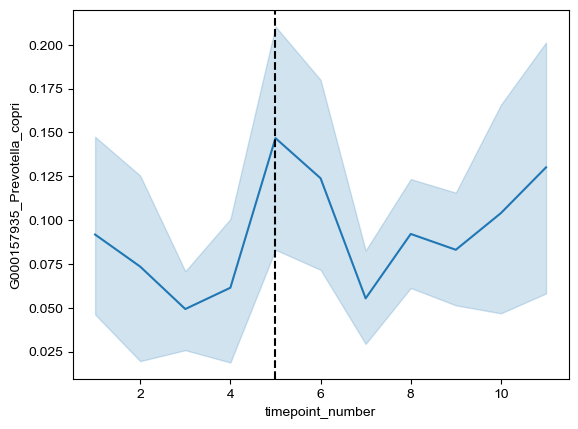

In [28]:
f = sns.lineplot(data=named_filt_rftable, x='timepoint_number', y='G000157935_Prevotella_copri',
             ci=68, )
                 #hue='marmoset_id')
f.axvline(5, linestyle='--', color='k') #diet transition timepoint

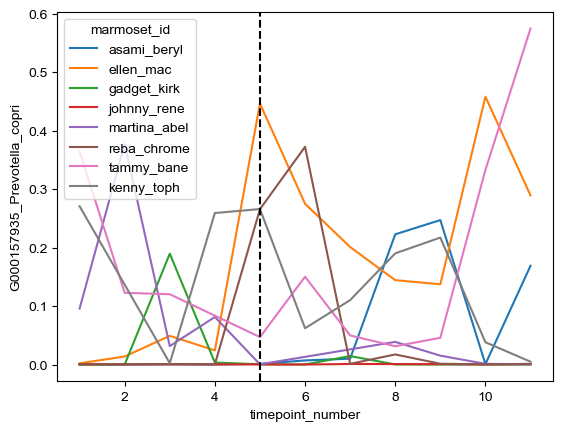

In [38]:
f = sns.lineplot(data=named_filt_rftable, x='timepoint_number', y='G000157935_Prevotella_copri',
             ci=68, hue='marmoset_id')
f.axvline(5, linestyle='--', color='k') #diet transition timepoint

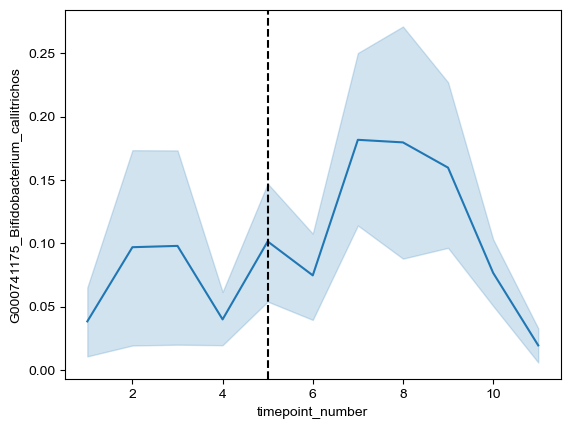

In [29]:
f = sns.lineplot(data=named_filt_rftable, x='timepoint_number', y='G000741175_Bifidobacterium_callitrichos',
             ci=68, )
                 #hue='marmoset_id')
f.axvline(5, linestyle='--', color='k') #diet transition timepoint

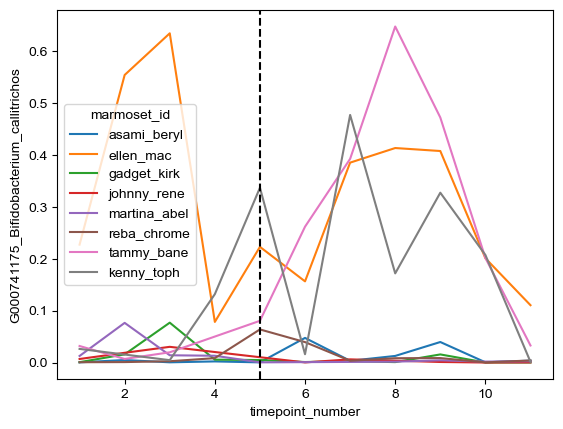

In [39]:
f = sns.lineplot(data=named_filt_rftable, x='timepoint_number', y='G000741175_Bifidobacterium_callitrichos',
             ci=68, hue='marmoset_id')
f.axvline(5, linestyle='--', color='k') #diet transition timepoint

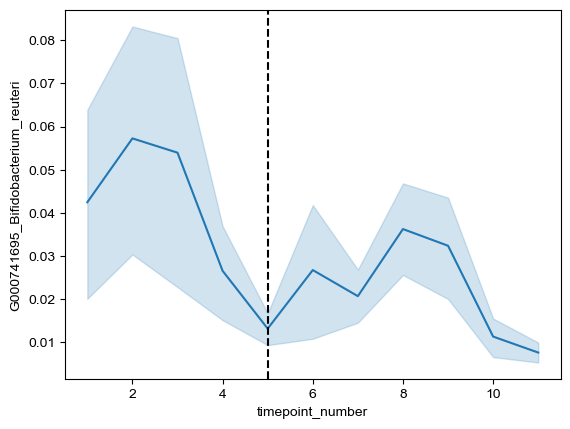

In [30]:
f = sns.lineplot(data=named_filt_rftable, x='timepoint_number', y='G000741695_Bifidobacterium_reuteri',
             ci=68, )
                 #hue='marmoset_id')
f.axvline(5, linestyle='--', color='k') #diet transition timepoint

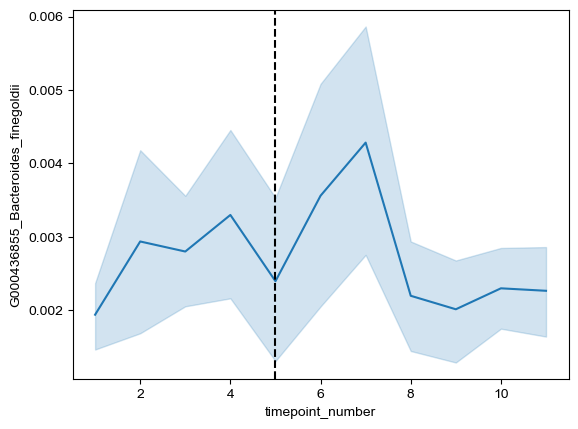

In [31]:
f = sns.lineplot(data=named_filt_rftable, x='timepoint_number', y='G000436855_Bacteroides_finegoldii',
             ci=68, )
                 #hue='marmoset_id')
f.axvline(5, linestyle='--', color='k') #diet transition timepoint

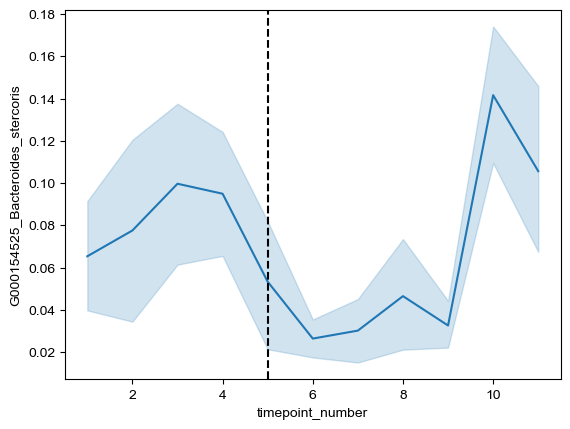

In [32]:
f = sns.lineplot(data=named_filt_rftable, x='timepoint_number', y='G000154525_Bacteroides_stercoris',
             ci=68, )
                 #hue='marmoset_id')
f.axvline(5, linestyle='--', color='k') #diet transition timepoint

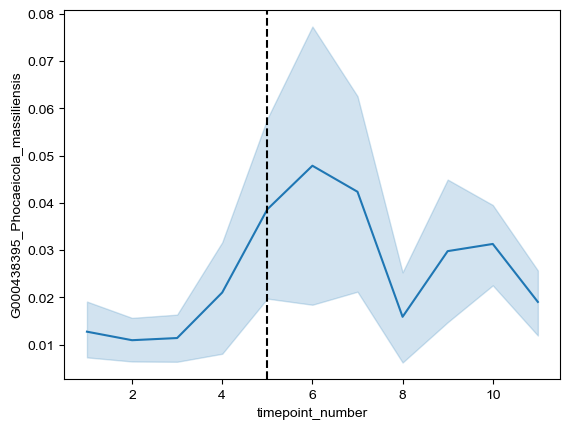

In [33]:
f = sns.lineplot(data=named_filt_rftable, x='timepoint_number', y='G000438395_Phocaeicola_massiliensis',
             ci=68, )
                 #hue='marmoset_id')
f.axvline(5, linestyle='--', color='k') #diet transition timepoint
# Previous name Bacteroides massiliensis
#  92.8 % 16S rRNA similarity to Bacteroides vulgatus

In [34]:
Ecoli = named_filt_rftable.filter(regex='Escherichia_coli')
Ecoli_named = pd.merge(Ecoli, 
                       metadata[['timepoint_number', 'collection_timepoint', 'source', 'source_M', 'source_F']], 
                       left_index=True, right_index=True)
Ecoli_named.head()

G000006925_Escherichia_coli  G000008865_Escherichia_coli  \
14577.AB.TP1                      0.000006                     0.000000   
14577.AB.TP10                     0.000120                     0.000126   
14577.AB.TP11                     0.014096                     0.015210   
14577.AB.TP2                      0.000000                     0.000000   
14577.AB.TP3                      0.000030                     0.000042   

               G000012005_Escherichia_coli  G000026325_Escherichia_coli  \
14577.AB.TP1                      0.000000                     0.000000   
14577.AB.TP10                     0.000120                     0.000114   
14577.AB.TP11                     0.011533                     0.015090   
14577.AB.TP2                      0.000006                     0.000006   
14577.AB.TP3                      0.000048                     0.000054   

               G000026345_Escherichia_coli  G000183345_Escherichia_coli  \
14577.AB.TP1                      0.000000                     0.000000   
14577.AB.TP10                     0.000120                     0.000096   
14577.AB.TP11                     0.012796                     0.011946   
14577.AB.TP2                      0.000006                     0.000006   
14577.AB.TP3                      0.000054                     0.000036   

               G000299455_Escherichia_coli  G000777575_Escherichia_coli  \
14577.AB.TP1                      0.000000                     0.000000   
14577.AB.TP10                     0.000162                     0.000036   
14577.AB.TP11                     0.022120                     0.005796   
14577.AB.TP2                      0.000000                     0.000006   
14577.AB.TP3                      0.000054                     0.000012   

               G000777875_Escherichia_coli  G000778805_Escherichia_coli  ...  \
14577.AB.TP1                      0.000000                     0.000000  ...   
14577.AB.TP10                     0.000030                     0.000018  ...   
14577.AB.TP11                     0.003928                     0.002731  ...   
14577.AB.TP2                      0.000006                     0.000000  ...   
14577.AB.TP3                      0.000006                     0.000006  ...   

               G001283625_Escherichia_coli  G007998125_Escherichia_coli  \
14577.AB.TP1                      0.000000                     0.000006   
14577.AB.TP10                     0.000162                     0.000126   
14577.AB.TP11                     0.019695                     0.018359   
14577.AB.TP2                      0.000006                     0.000012   
14577.AB.TP3                      0.000060                     0.000042   

               G008273775_Escherichia_coli  G012357415_Escherichia_coli  \
14577.AB.TP1                      0.000000                     0.000006   
14577.AB.TP10                     0.000114                     0.000102   
14577.AB.TP11                     0.018790                     0.014335   
14577.AB.TP2                      0.000012                     0.000006   
14577.AB.TP3                      0.000084                     0.000036   

               G900227605_Escherichia_coli  timepoint_number  \
14577.AB.TP1                      0.000024                 1   
14577.AB.TP10                     0.000042                10   
14577.AB.TP11                     0.002485                11   
14577.AB.TP2                      0.000000                 2   
14577.AB.TP3                      0.000030                 3   

               collection_timepoint             source  source_M  source_F  
14577.AB.TP1                    Pre  internal_internal  internal  external  
14577.AB.TP10                  LTFU  internal_internal  internal  external  
14577.AB.TP11                  LTFU  internal_internal  internal  external  
14577.AB.TP2                    Pre  internal_internal  internal  external  
14577.AB.TP3                    Pre  internal_internal  in

In [35]:
Ecoli_rfmt = pd.melt(Ecoli_named, id_vars=['timepoint_number', 'collection_timepoint', 'source', 'source_M', 'source_F'], 
                     value_vars=Ecoli.columns)
Ecoli_rfmt.head()

timepoint_number collection_timepoint             source  source_M  \
0                 1                  Pre  internal_internal  internal   
1                10                 LTFU  internal_internal  internal   
2                11                 LTFU  internal_internal  internal   
3                 2                  Pre  internal_internal  internal   
4                 3                  Pre  internal_internal  internal   

   source_F                     variable     value  
0  external  G000006925_Escherichia_coli  0.000006  
1  external  G000006925_Escherichia_coli  0.000120  
2  external  G000006925_Escherichia_coli  0.014096  
3  external  G000006925_Escherichia_coli  0.000000  
4  external  G000006925_Escherichia_coli  0.000030

In [36]:
Ecoli_rfmt['timepoint_number'] = Ecoli_rfmt['timepoint_number'].astype(float)

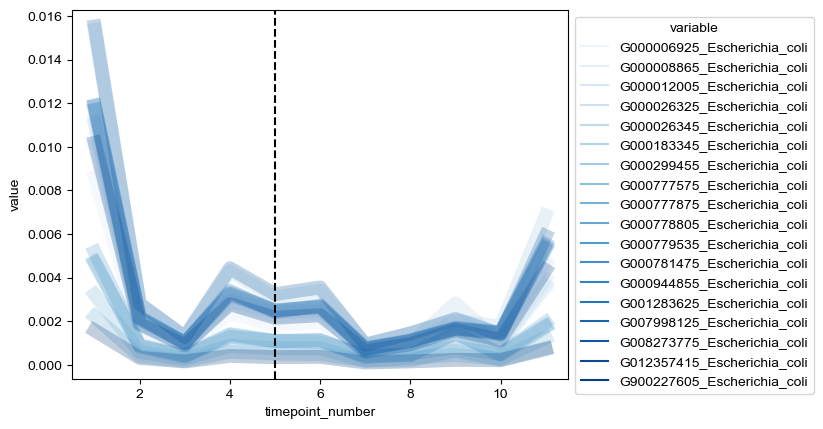

In [37]:
ax = sns.lineplot(data=Ecoli_rfmt, x='timepoint_number', y='value', hue='variable', 
                  palette='Blues', ci=None, linewidth=10, alpha=0.25)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.axvline(5, linestyle='--', color='k') #diet transition timepoint

In [49]:
Btaxa = taxonomy[taxonomy['Taxon'].str.contains("Bifidobacterium")].copy()
Btaxa.set_index('Feature ID', inplace=True)
Btaxa.head()

Taxon
Feature ID                                                   
G000007525  d__Bacteria; p__Actinobacteriota; c__Actinomyc...
G000010425  d__Bacteria; p__Actinobacteriota; c__Actinomyc...
G000022965  d__Bacteria; p__Actinobacteriota; c__Actinomyc...
G000025205  d__Bacteria; p__Actinobacteriota; c__Actinomyc...
G000159155  d__Bacteria; p__Actinobacteriota; c__Actinomyc...

In [57]:
Bfilt_relf_table = pd.merge(Btaxa, rar_relf, left_index=True, right_index=True)
Bfilt_relf_table = Bfilt_relf_table.reset_index()
Bfilt_relf_table.head()

index                                              Taxon  \
0  G000007525  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
1  G000010425  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
2  G000022965  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
3  G000025205  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
4  G000159155  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   

   14577.EM.TP1  14577.GK.TP1  14577.AB.TP1  14577.JR.TP1  14577.MA.TP11  \
0      0.005401      0.000060      0.000066      0.001784       0.003012   
1      0.001671      0.000024      0.000030      0.000527       0.003461   
2      0.000293      0.000006      0.000000      0.000060       0.000072   
3      0.000090      0.000012      0.000006      0.000012       0.000072   
4      0.000084      0.000000      0.000000      0.000012       0.000036   

   14577.MA.TP1  14577.RC.TP1  14577.TB.TP1  ...  14577.EM.TP4  14577.JR.TP3  \
0      0.000180      0.000060      0.000509  ...      0.013503      0.004814   
1      0.000072      0.000048      0.000186  ...      0.014904      0.001683   
2      0.000018      0.000006      0.000036  ...      0.000138      0.000186   
3      0.000006      0.000000      0.000012  ...      0.000036      0.000060   
4      0.000006      0.000006      0.000012  ...      0.000024      0.000018   

   14577.AB.TP3  14577.GK.TP2  14577.JR.TP6  14577.MA.TP2  14577.AB.TP4  \
0      0.000234      0.000287      0.000048      0.001263      0.000443   
1      0.000078      0.000144      0.000018      0.000377      0.000126   
2      0.000000      0.000030      0.000000      0.000090      0.000012   
3      0.000006      0.000018      0.000000      0.000006      0.000012   
4      0.000000      0.000000      0.000000      0.000030      0.000000   

   14577.GK.TP6  14577.RC.TP7  14577.TB.TP5  
0      0.000114      0.002144      0.000743  
1      0.000036      0.000419      0.000437  
2      0.000006      0.000018      0.000096  
3      0.000000      0.000018      0.000042  
4      0.000000      0.000012      0.000036  

[5 rows x 83 columns]

In [58]:
Bfilt_relf_table['species'] = Bfilt_relf_table['Taxon'].str.rsplit("s__").str[1]
Bfilt_relf_table['species'] = Bfilt_relf_table['species'].replace(' ', '_', regex=True)
Bfilt_relf_table.head()

index                                              Taxon  \
0  G000007525  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
1  G000010425  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
2  G000022965  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
3  G000025205  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
4  G000159155  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   

   14577.EM.TP1  14577.GK.TP1  14577.AB.TP1  14577.JR.TP1  14577.MA.TP11  \
0      0.005401      0.000060      0.000066      0.001784       0.003012   
1      0.001671      0.000024      0.000030      0.000527       0.003461   
2      0.000293      0.000006      0.000000      0.000060       0.000072   
3      0.000090      0.000012      0.000006      0.000012       0.000072   
4      0.000084      0.000000      0.000000      0.000012       0.000036   

   14577.MA.TP1  14577.RC.TP1  14577.TB.TP1  ...  14577.JR.TP3  14577.AB.TP3  \
0      0.000180      0.000060      0.000509  ...      0.004814      0.000234   
1      0.000072      0.000048      0.000186  ...      0.001683      0.000078   
2      0.000018      0.000006      0.000036  ...      0.000186      0.000000   
3      0.000006      0.000000      0.000012  ...      0.000060      0.000006   
4      0.000006      0.000006      0.000012  ...      0.000018      0.000000   

   14577.GK.TP2  14577.JR.TP6  14577.MA.TP2  14577.AB.TP4  14577.GK.TP6  \
0      0.000287      0.000048      0.001263      0.000443      0.000114   
1      0.000144      0.000018      0.000377      0.000126      0.000036   
2      0.000030      0.000000      0.000090      0.000012      0.000006   
3      0.000018      0.000000      0.000006      0.000012      0.000000   
4      0.000000      0.000000      0.000030      0.000000      0.000000   

   14577.RC.TP7  14577.TB.TP5                       species  
0      0.002144      0.000743        Bifidobacterium_longum  
1      0.000419      0.000437  Bifidobacterium_adolescentis  
2      0.000018      0.000096      Bifidobacterium_animalis  
3      0.000018      0.000042   Bifidobacterium_swidsinskii  
4      0.000012      0.000036      Bifidobacterium_vaginale  

[5 rows x 84 columns]

In [59]:
Bfilt_relf_table['named'] = Bfilt_relf_table['index'].astype(str)+"_"+Bfilt_relf_table['species'].astype(str)
Bfilt_relf_table.head()

index                                              Taxon  \
0  G000007525  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
1  G000010425  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
2  G000022965  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
3  G000025205  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   
4  G000159155  d__Bacteria; p__Actinobacteriota; c__Actinomyc...   

   14577.EM.TP1  14577.GK.TP1  14577.AB.TP1  14577.JR.TP1  14577.MA.TP11  \
0      0.005401      0.000060      0.000066      0.001784       0.003012   
1      0.001671      0.000024      0.000030      0.000527       0.003461   
2      0.000293      0.000006      0.000000      0.000060       0.000072   
3      0.000090      0.000012      0.000006      0.000012       0.000072   
4      0.000084      0.000000      0.000000      0.000012       0.000036   

   14577.MA.TP1  14577.RC.TP1  14577.TB.TP1  ...  14577.AB.TP3  14577.GK.TP2  \
0      0.000180      0.000060      0.000509  ...      0.000234      0.000287   
1      0.000072      0.000048      0.000186  ...      0.000078      0.000144   
2      0.000018      0.000006      0.000036  ...      0.000000      0.000030   
3      0.000006      0.000000      0.000012  ...      0.000006      0.000018   
4      0.000006      0.000006      0.000012  ...      0.000000      0.000000   

   14577.JR.TP6  14577.MA.TP2  14577.AB.TP4  14577.GK.TP6  14577.RC.TP7  \
0      0.000048      0.001263      0.000443      0.000114      0.002144   
1      0.000018      0.000377      0.000126      0.000036      0.000419   
2      0.000000      0.000090      0.000012      0.000006      0.000018   
3      0.000000      0.000006      0.000012      0.000000      0.000018   
4      0.000000      0.000030      0.000000      0.000000      0.000012   

   14577.TB.TP5                       species  \
0      0.000743        Bifidobacterium_longum   
1      0.000437  Bifidobacterium_adolescentis   
2      0.000096      Bifidobacterium_animalis   
3      0.000042   Bifidobacterium_swidsinskii   
4      0.000036      Bifidobacterium_vaginale   

                                     named  
0        G000007525_Bifidobacterium_longum  
1  G000010425_Bifidobacterium_adolescentis  
2      G000022965_Bifidobacterium_animalis  
3   G000025205_Bifidobacterium_swidsinskii  
4      G000159155_Bifidobacterium_vaginale  

[5 rows x 85 columns]

In [60]:
Bfilt_relf_table2 = Bfilt_relf_table.set_index('named')
Bfilt_relf_table2.drop(columns=['Taxon', 'species', 'index'], inplace=True)
Bfilt_relf_table2.head()

14577.EM.TP1  14577.GK.TP1  \
named                                                                 
G000007525_Bifidobacterium_longum            0.005401      0.000060   
G000010425_Bifidobacterium_adolescentis      0.001671      0.000024   
G000022965_Bifidobacterium_animalis          0.000293      0.000006   
G000025205_Bifidobacterium_swidsinskii       0.000090      0.000012   
G000159155_Bifidobacterium_vaginale          0.000084      0.000000   

                                         14577.AB.TP1  14577.JR.TP1  \
named                                                                 
G000007525_Bifidobacterium_longum            0.000066      0.001784   
G000010425_Bifidobacterium_adolescentis      0.000030      0.000527   
G000022965_Bifidobacterium_animalis          0.000000      0.000060   
G000025205_Bifidobacterium_swidsinskii       0.000006      0.000012   
G000159155_Bifidobacterium_vaginale          0.000000      0.000012   

                                         14577.MA.TP11  14577.MA.TP1  \
named                                                                  
G000007525_Bifidobacterium_longum             0.003012      0.000180   
G000010425_Bifidobacterium_adolescentis       0.003461      0.000072   
G000022965_Bifidobacterium_animalis           0.000072      0.000018   
G000025205_Bifidobacterium_swidsinskii        0.000072      0.000006   
G000159155_Bifidobacterium_vaginale           0.000036      0.000006   

                                         14577.RC.TP1  14577.TB.TP1  \
named                                                                 
G000007525_Bifidobacterium_longum            0.000060      0.000509   
G000010425_Bifidobacterium_adolescentis      0.000048      0.000186   
G000022965_Bifidobacterium_animalis          0.000006      0.000036   
G000025205_Bifidobacterium_swidsinskii       0.000000      0.000012   
G000159155_Bifidobacterium_vaginale          0.000006      0.000012   

                                         14577.TK.TP1  14577.GK.TP4  ...  \
named                                                                ...   
G000007525_Bifidobacterium_longum            0.001162      0.000407  ...   
G000010425_Bifidobacterium_adolescentis      0.000521      0.000395  ...   
G000022965_Bifidobacterium_animalis          0.000072      0.000036  ...   
G000025205_Bifidobacterium_swidsinskii       0.000024      0.000036  ...   
G000159155_Bifidobacterium_vaginale          0.000012      0.000024  ...   

                                         14577.EM.TP4  14577.JR.TP3  \
named                                                                 
G000007525_Bifidobacterium_longum            0.013503      0.004814   
G000010425_Bifidobacterium_adolescentis      0.014904      0.001683   
G000022965_Bifidobacterium_animalis          0.000138      0.000186   
G000025205_Bifidobacterium_swidsinskii       0.000036      0.000060   
G000159155_Bifidobacterium_vaginale          0.000024      0.000018   

                                         14577.AB.TP3  14577.GK.TP2  \
named                                                                 
G000007525_Bifidobacterium_longum            0.000234      0.000287   
G000010425_Bifidobacterium_adolescentis      0.000078      0.000144   
G000022965_Bifidobacterium_animalis          0.000000      0.000030   
G000025205_Bifidobacterium_swidsinskii       0.000006      0.000018   
G000159155_Bifidobacterium_vaginale          0.000000      0.000000   

                                         14577.JR.TP6  14577.MA.TP2  \
named                                                                 
G000007525_Bifidobacterium_longum            0.000048      0.001263   
G000010425_Bifidobacterium_adolescentis      0.000018      0.000377   
G000022965_Bifidobacterium_animalis          0.000000      0.000090   
G000025205_Bifidobacterium_swidsinskii       0.000000      0.000006   
G000159155_Bifidobacterium_vaginale          0.000000      0.000030   

               

In [61]:
Bfilt_relf_table2.index

Index(['G000007525_Bifidobacterium_longum',
       'G000010425_Bifidobacterium_adolescentis',
       'G000022965_Bifidobacterium_animalis',
       'G000025205_Bifidobacterium_swidsinskii',
       'G000159155_Bifidobacterium_vaginale',
       'G000165905_Bifidobacterium_bifidum',
       'G000304215_Bifidobacterium_asteroides',
       'G000347695_Bifidobacterium_thermophilum',
       'G000414445_Bifidobacterium_vaginale_D',
       'G000414465_Bifidobacterium_vaginale_D',
       'G000414525_Bifidobacterium_vaginale',
       'G000737845_Bifidobacterium_bombi',
       'G000737865_Bifidobacterium_indicum',
       'G000738005_Bifidobacterium_crudilactis',
       'G000741135_Bifidobacterium_choerinum',
       'G000741165_Bifidobacterium_biavatii',
       'G000741175_Bifidobacterium_callitrichos',
       'G000741205_Bifidobacterium_gallicum',
       'G000741215_Bifidobacterium_pullorum_B',
       'G000741255_Bifidobacterium_magnum',
       'G000741285_Bifidobacterium_mongoliense',
       'G0007

In [64]:
named_Bfilt_rftable = pd.merge(metadata, Bfilt_relf_table2.T, right_index=True, left_index=True )
named_Bfilt_rftable

Pre_Post collection_timepoint   keep collection_timestamp  \
14577.AB.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.AB.TP10     Post                 LTFU  False  4/14/202212:00:00PM   
14577.AB.TP11     Post                 LTFU  False  7/11/202212:00:00PM   
14577.AB.TP2       Pre                  Pre   True   6/3/202112:00:00PM   
14577.AB.TP3       Pre                  Pre   True   6/8/202112:00:00PM   
14577.AB.TP4       Pre                  Pre   True  6/14/202112:00:00PM   
14577.AB.TP5       NaN           Transition  False  6/25/202112:00:00PM   
14577.AB.TP6      Post                 Post   True   7/1/202112:00:00PM   
14577.AB.TP7      Post                 Post   True   7/2/202112:00:00PM   
14577.AB.TP8      Post                 Post   True   7/9/202112:00:00PM   
14577.AB.TP9      Post                 Post   True  7/19/202112:00:00PM   
14577.EM.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.EM.TP10     Post                 LTFU  False  4/14/202212:00:00PM   
14577.EM.TP11     Post                 LTFU  False  7/11/202212:00:00PM   
14577.EM.TP2       Pre                  Pre   True   6/3/202112:00:00PM   
14577.EM.TP3       Pre                  Pre   True   6/8/202112:00:00PM   
14577.EM.TP4       Pre                  Pre   True  6/14/202112:00:00PM   
14577.EM.TP5       NaN           Transition  False  6/25/202112:00:00PM   
14577.EM.TP6      Post                 Post   True   7/1/202112:00:00PM   
14577.EM.TP7      Post                 Post   True   7/2/202112:00:00PM   
14577.EM.TP8      Post                 Post   True   7/9/202112:00:00PM   
14577.EM.TP9      Post                 Post   True  7/19/202112:00:00PM   
14577.GK.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.GK.TP10     Post                 LTFU  False  4/14/202212:00:00PM   
14577.GK.TP11     Post                 LTFU  False  7/11/202212:00:00PM   
14577.GK.TP2       Pre                  Pre   True   6/3/202112:00:00PM   
14577.GK.TP3       Pre                  Pre   True   6/8/202112:00:00PM   
14577.GK.TP4       Pre                  Pre   True  6/14/202112:00:00PM   
14577.GK.TP5       NaN           Transition  False  6/25/202112:00:00PM   
14577.GK.TP6      Post                 Post   True   7/1/202112:00:00PM   
14577.GK.TP7      Post                 Post   True   7/2/202112:00:00PM   
14577.GK.TP8      Post                 Post   True   7/9/202112:00:00PM   
14577.GK.TP9      Post                 Post   True  7/19/202112:00:00PM   
14577.JR.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.JR.TP10     Post                 LTFU  False  4/14/202212:00:00PM   
14577.JR.TP11     Post                 LTFU  False  7/11/202212:00:00PM   
14577.JR.TP2       Pre                  Pre   True   6/3/202112:00:00PM   
14577.JR.TP3       Pre                  Pre   True   6/8/202112:00:00PM   
14577.JR.TP6      Post                 Post   True   7/1/202112:00:00PM   
14577.JR.TP7      Post                 Post   True   7/2/202112:00:00PM   
14577.JR.TP9      Post                 Post   True  7/19/202112:00:00PM   
14577.MA.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.MA.TP10     Post                 LTFU  False  4/14/202212:00:00PM   
14577.MA.TP11     Post                 LTFU  False  7/11/202212:00:00PM   
14577.MA.TP2       Pre                  Pre   True   6/3/202112:00:00PM   
14577.MA.TP3       Pre                  Pre   True   6/8/202112:00:00PM   
14577.MA.TP4       Pre                  Pre   True  6/14/202112:00:00PM   
14577.MA.TP5       NaN           Transition  False  6/25/202112:00:00PM   
14577.MA.TP8      Post                 Post   True   7/9/202112:00:00PM   
14577.MA.TP9      Post                 Post   True  7/19/202112:00:00PM   
14577.RC.TP1       Pre                  Pre   True   6/2/202112:00:00PM   
14577.RC.TP10     Post                 LTFU  False  4/14/202212:00:00PM   
14577.RC.TP11     Post                 

In [65]:
pd.options.display.max_rows = None
print(named_Bfilt_rftable.dtypes)

Pre_Post                                          object
collection_timepoint                              object
keep                                                bool
collection_timestamp                              object
date_collected                                    object
description                                      float64
diet                                              object
elevation                                          int64
elevation_units                                   object
empo_1                                            object
empo_2                                            object
empo_3                                            object
env_biome                                         object
env_feature                                       object
env_material                                      object
env_package                                       object
geo_loc_name                                      object
health_state                   

In [76]:
Bifido_named = pd.merge(Bfilt_relf_table2.T, 
                       metadata[['timepoint_number', 'collection_timepoint', 'Pre_Post', 'marmoset_id']], 
                       left_index=True, right_index=True)
Bifido_named.head()

G000007525_Bifidobacterium_longum  \
14577.EM.TP1                            0.005401   
14577.GK.TP1                            0.000060   
14577.AB.TP1                            0.000066   
14577.JR.TP1                            0.001784   
14577.MA.TP11                           0.003012   

               G000010425_Bifidobacterium_adolescentis  \
14577.EM.TP1                                  0.001671   
14577.GK.TP1                                  0.000024   
14577.AB.TP1                                  0.000030   
14577.JR.TP1                                  0.000527   
14577.MA.TP11                                 0.003461   

               G000022965_Bifidobacterium_animalis  \
14577.EM.TP1                              0.000293   
14577.GK.TP1                              0.000006   
14577.AB.TP1                              0.000000   
14577.JR.TP1                              0.000060   
14577.MA.TP11                             0.000072   

               G000025205_Bifidobacterium_swidsinskii  \
14577.EM.TP1                                 0.000090   
14577.GK.TP1                                 0.000012   
14577.AB.TP1                                 0.000006   
14577.JR.TP1                                 0.000012   
14577.MA.TP11                                0.000072   

               G000159155_Bifidobacterium_vaginale  \
14577.EM.TP1                              0.000084   
14577.GK.TP1                              0.000000   
14577.AB.TP1                              0.000000   
14577.JR.TP1                              0.000012   
14577.MA.TP11                             0.000036   

               G000165905_Bifidobacterium_bifidum  \
14577.EM.TP1                             0.004665   
14577.GK.TP1                             0.000066   
14577.AB.TP1                             0.000048   
14577.JR.TP1                             0.000455   
14577.MA.TP11                            0.000695   

               G000304215_Bifidobacterium_asteroides  \
14577.EM.TP1                                0.000144   
14577.GK.TP1                                0.000018   
14577.AB.TP1                                0.000006   
14577.JR.TP1                                0.000030   
14577.MA.TP11                               0.000036   

               G000347695_Bifidobacterium_thermophilum  \
14577.EM.TP1                                  0.000431   
14577.GK.TP1                                  0.000012   
14577.AB.TP1                                  0.000018   
14577.JR.TP1                                  0.000072   
14577.MA.TP11                                 0.000084   

               G000414445_Bifidobacterium_vaginale_D  \
14577.EM.TP1                                0.000006   
14577.GK.TP1                                0.000000   
14577.AB.TP1                                0.000000   
14577.JR.TP1                                0.000000   
14577.MA.TP11                               0.000006   

               G000414465_Bifidobacterium_vaginale_D  ...  \
14577.EM.TP1                                0.000012  ...   
14577.GK.TP1                                0.000006  ...   
14577.AB.TP1                                0.000000  ...   
14577.JR.TP1                                0.000000  ...   
14577.MA.TP11                               0.000000  ...   

               G002259685_Bifidobacterium_eulemuris  \
14577.EM.TP1                               0.002539   
14577.GK.TP1                               0.000180   
14577.AB.TP1                               0.000078   
14577.JR.TP1                               0.000198   
14577.MA.TP11                              0.001060   

               G002259795_Bifidobacterium_aquikefiri  \
14577.EM.TP1                                0.000054   
14577.GK.TP1                                0.000012   
14577.AB.TP1                                0.000000   
14577.JR.TP1                                0.000000   
14577.MA.TP11                           

In [77]:
Bifido_named['timepoint_number'] = Bifido_named['timepoint_number'].astype(float)

In [78]:
Bifido_rfmt = pd.melt(Bifido_named, id_vars=['timepoint_number', 'collection_timepoint', 'Pre_Post', 'marmoset_id'], 
                     value_vars=Bifido_named.columns)
Bifido_rfmt.head()

timepoint_number collection_timepoint Pre_Post   marmoset_id  \
0               1.0                  Pre      Pre     ellen_mac   
1               1.0                  Pre      Pre   gadget_kirk   
2               1.0                  Pre      Pre   asami_beryl   
3               1.0                  Pre      Pre   johnny_rene   
4              11.0                 LTFU     Post  martina_abel   

                            variable     value  
0  G000007525_Bifidobacterium_longum  0.005401  
1  G000007525_Bifidobacterium_longum  0.000060  
2  G000007525_Bifidobacterium_longum  0.000066  
3  G000007525_Bifidobacterium_longum  0.001784  
4  G000007525_Bifidobacterium_longum  0.003012

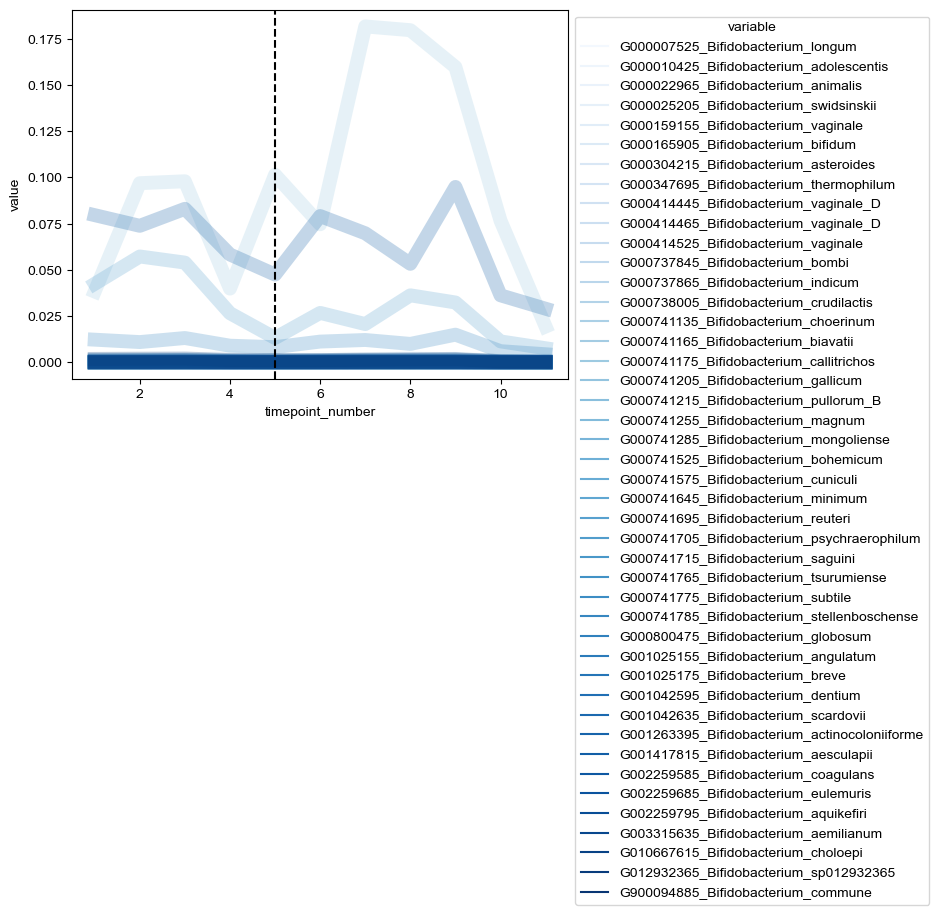

In [79]:
ax = sns.lineplot(data=Bifido_rfmt, x='timepoint_number', y='value', hue='variable', 
                  palette='Blues', ci=None, linewidth=10, alpha=0.25)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.axvline(5, linestyle='--', color='k') #diet transition timepoint

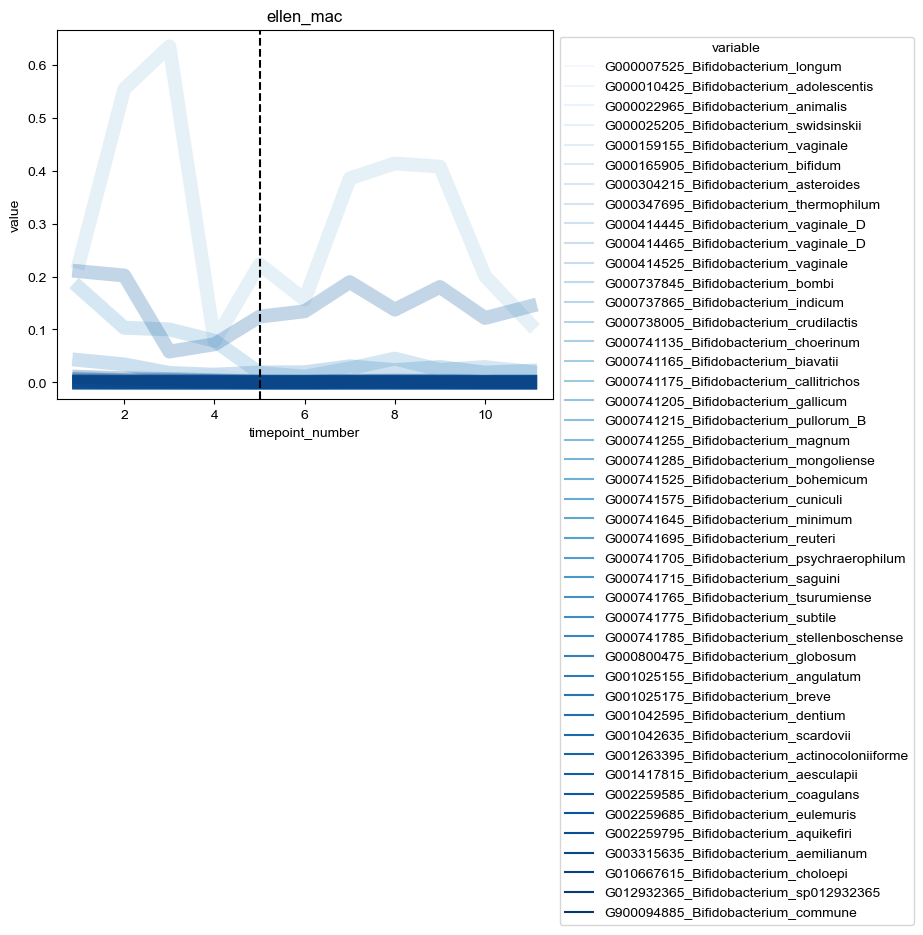

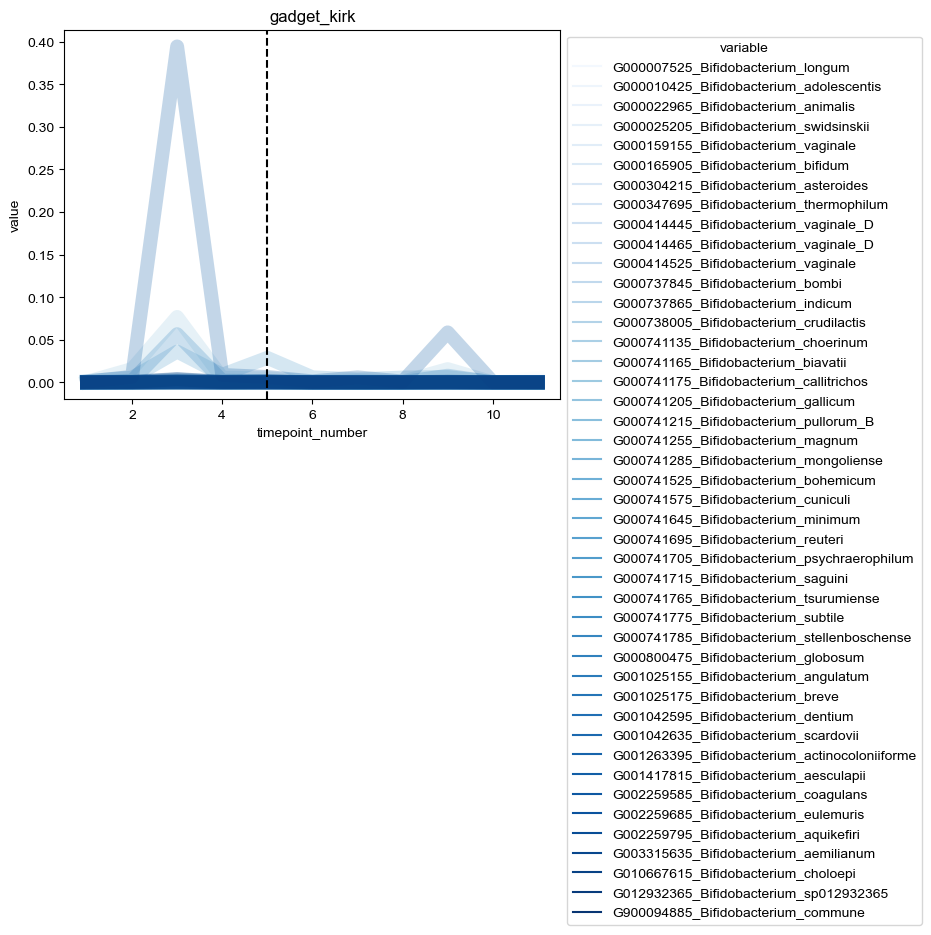

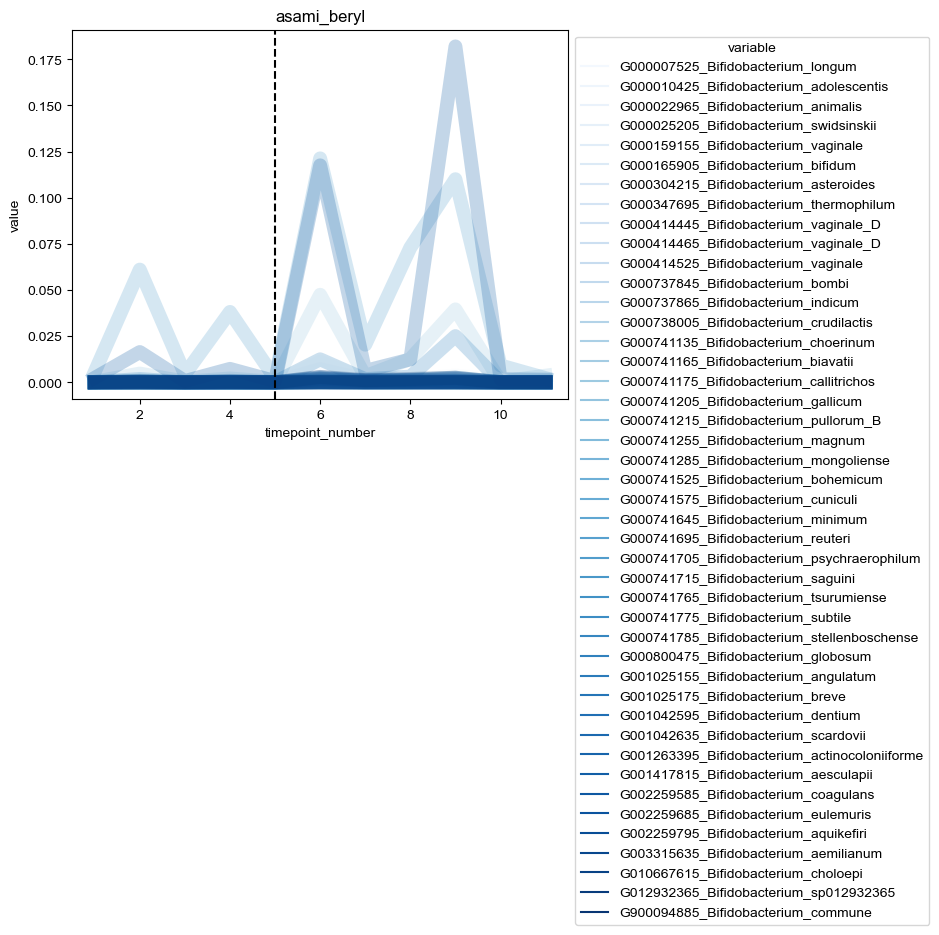

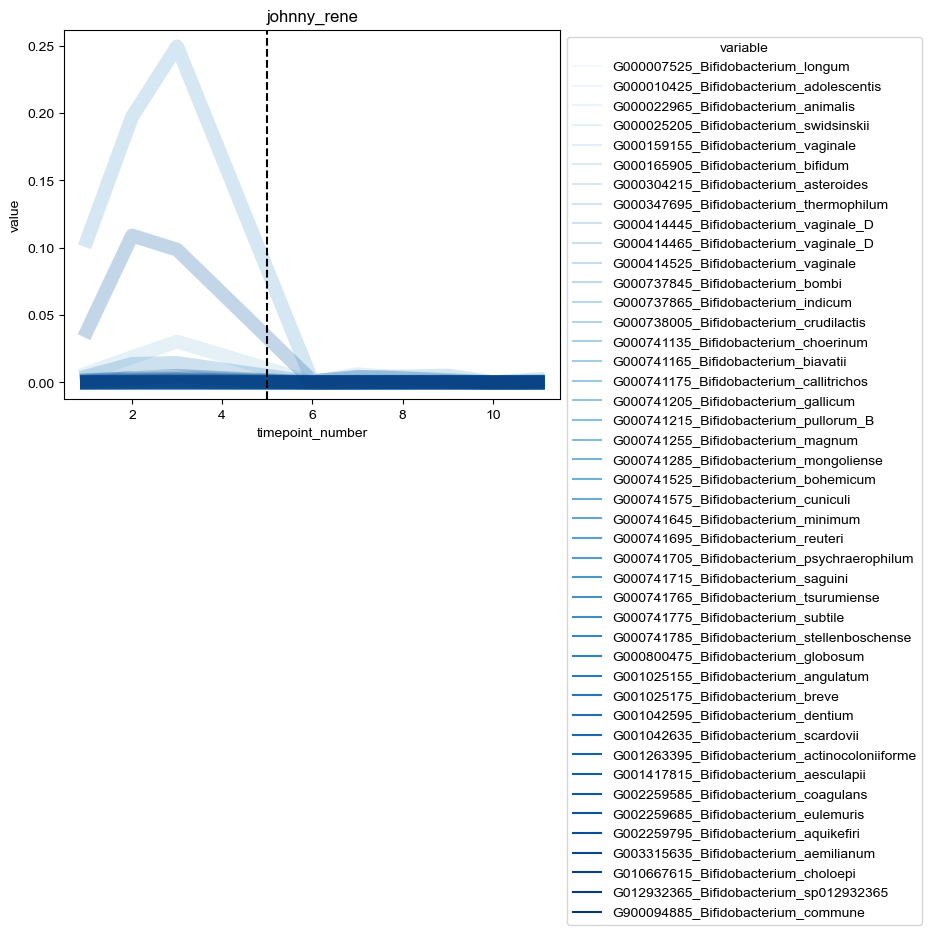

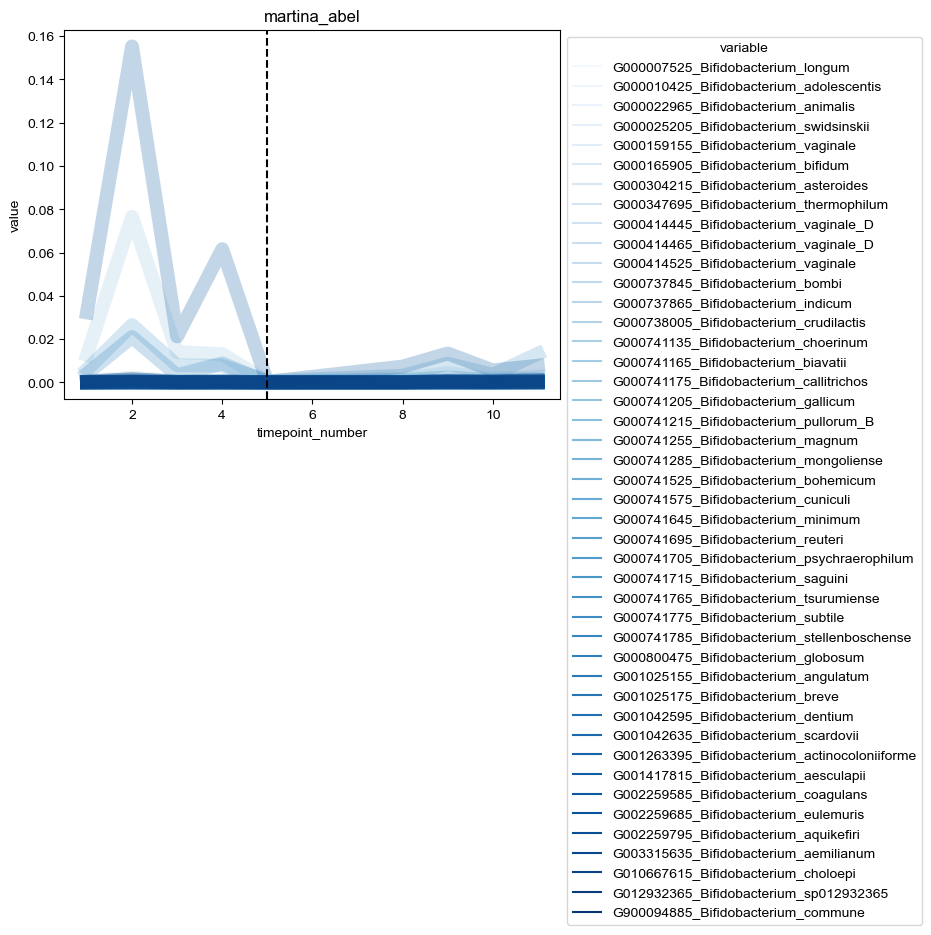

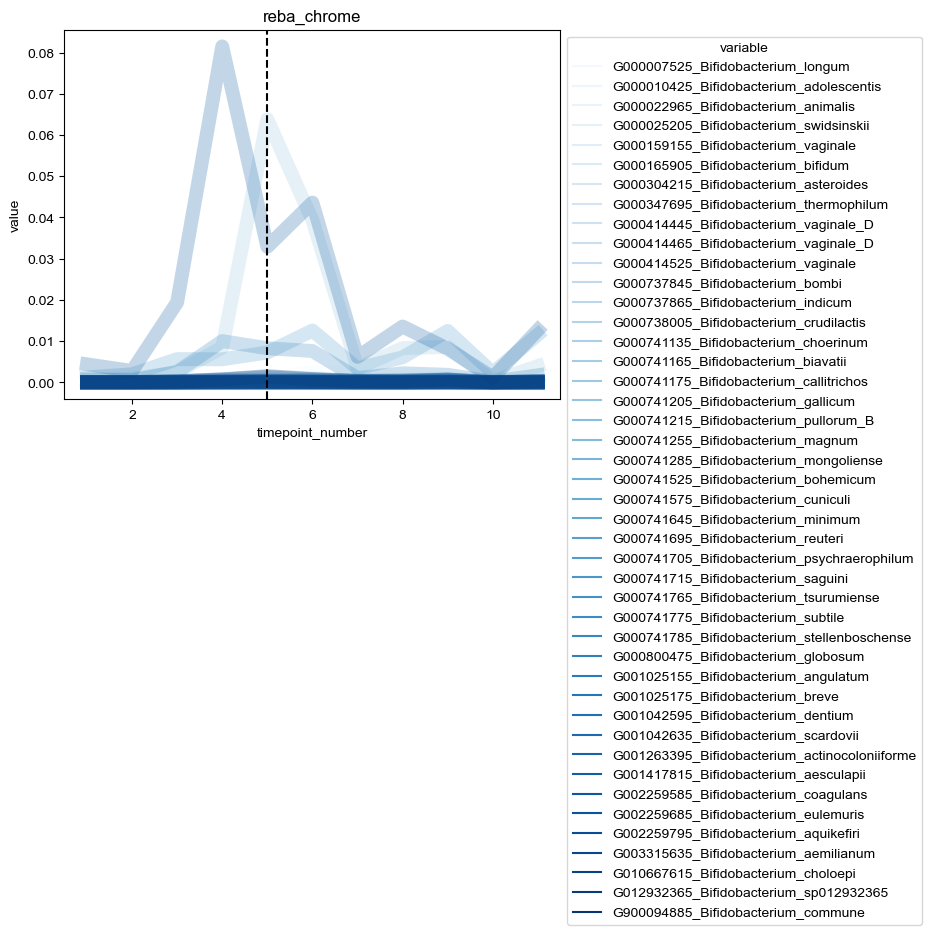

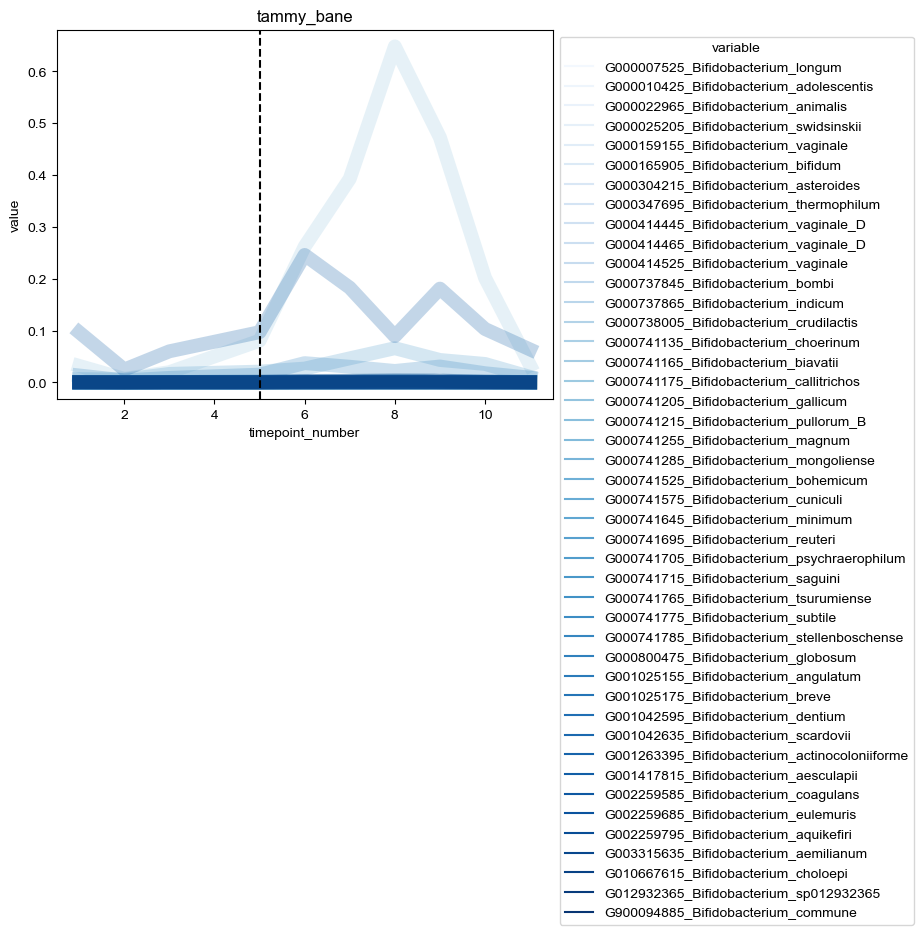

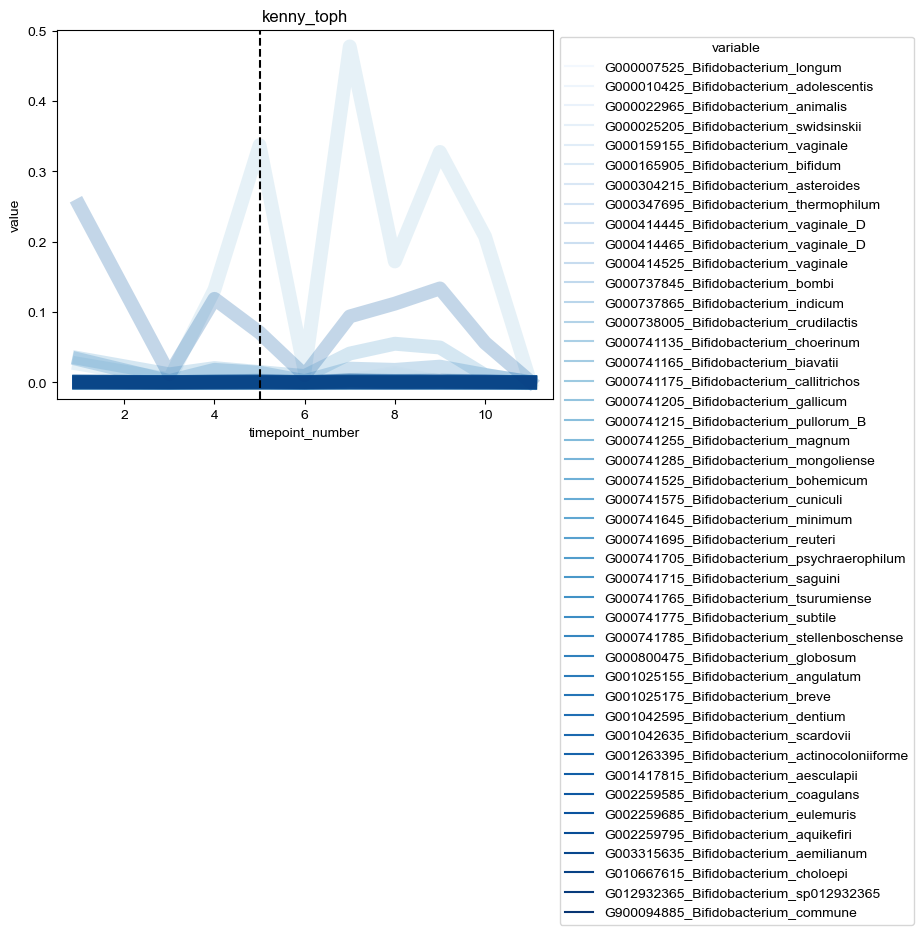

In [81]:
for marm in Bifido_rfmt.marmoset_id.unique():
    ax = sns.lineplot(data=Bifido_rfmt[Bifido_rfmt['marmoset_id']==marm], 
                      x='timepoint_number', y='value', hue='variable', 
                  palette='Blues', ci=None, linewidth=10, alpha=0.25)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.axvline(5, linestyle='--', color='k') #diet transition timepoint
    plt.title(marm)
    plt.show()